In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

In [3]:
base_dir = "plantvillage dataset/color"
img_size = (128, 128)
batch_size = 32
epochs = 10
n_splits = 5
random.seed(42)

class_pairs = [
    ("Apple___healthy", "Apple___Apple_scab"),
    ("Cherry_(including_sour)___healthy", "Cherry_(including_sour)___Powdery_mildew"),
    ("Grape___healthy", "Grape___Black_rot")
]

In [4]:

def create_model(hidden_units=64, layers=2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(img_size[0], img_size[1], 3)))
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(2,2))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
        model.add(tf.keras.layers.MaxPooling2D(2,2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hidden_units, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def prepare_images(class1, class2, max_images=800):
    images, labels = [], []
    for label, cls in enumerate([class1, class2]):
        folder = os.path.join(base_dir, cls)
        files = os.listdir(folder)
        random.shuffle(files)
        for fname in files[:max_images]:
            path = os.path.join(folder, fname)
            img = load_img(path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

def show_all_class_pairs(class_pairs):
    total_pairs = len(class_pairs)
    fig, axes = plt.subplots(total_pairs, 8, figsize=(20, 3 * total_pairs))

    for row, (class1, class2) in enumerate(class_pairs):
        plant_name = class1.split("___")[0]
        disease_name = class2.split("___")[-1]
        healthy_name = class1.split("___")[-1]

        images, labels = prepare_images(class1, class2)
        idx_healthy = np.where(labels == 0)[0][:4]
        idx_diseased = np.where(labels == 1)[0][:4]

        for i in range(4):
            ax = axes[row, i]
            ax.imshow(images[idx_healthy[i]])
            ax.set_title(f"{plant_name} ({healthy_name})")
            ax.axis("off")

            ax = axes[row, i+4]
            ax.imshow(images[idx_diseased[i]])
            ax.set_title(f"{plant_name} ({disease_name})")
            ax.axis("off")

    plt.tight_layout()
    plt.show()

def plot_training(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Validation Acc')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

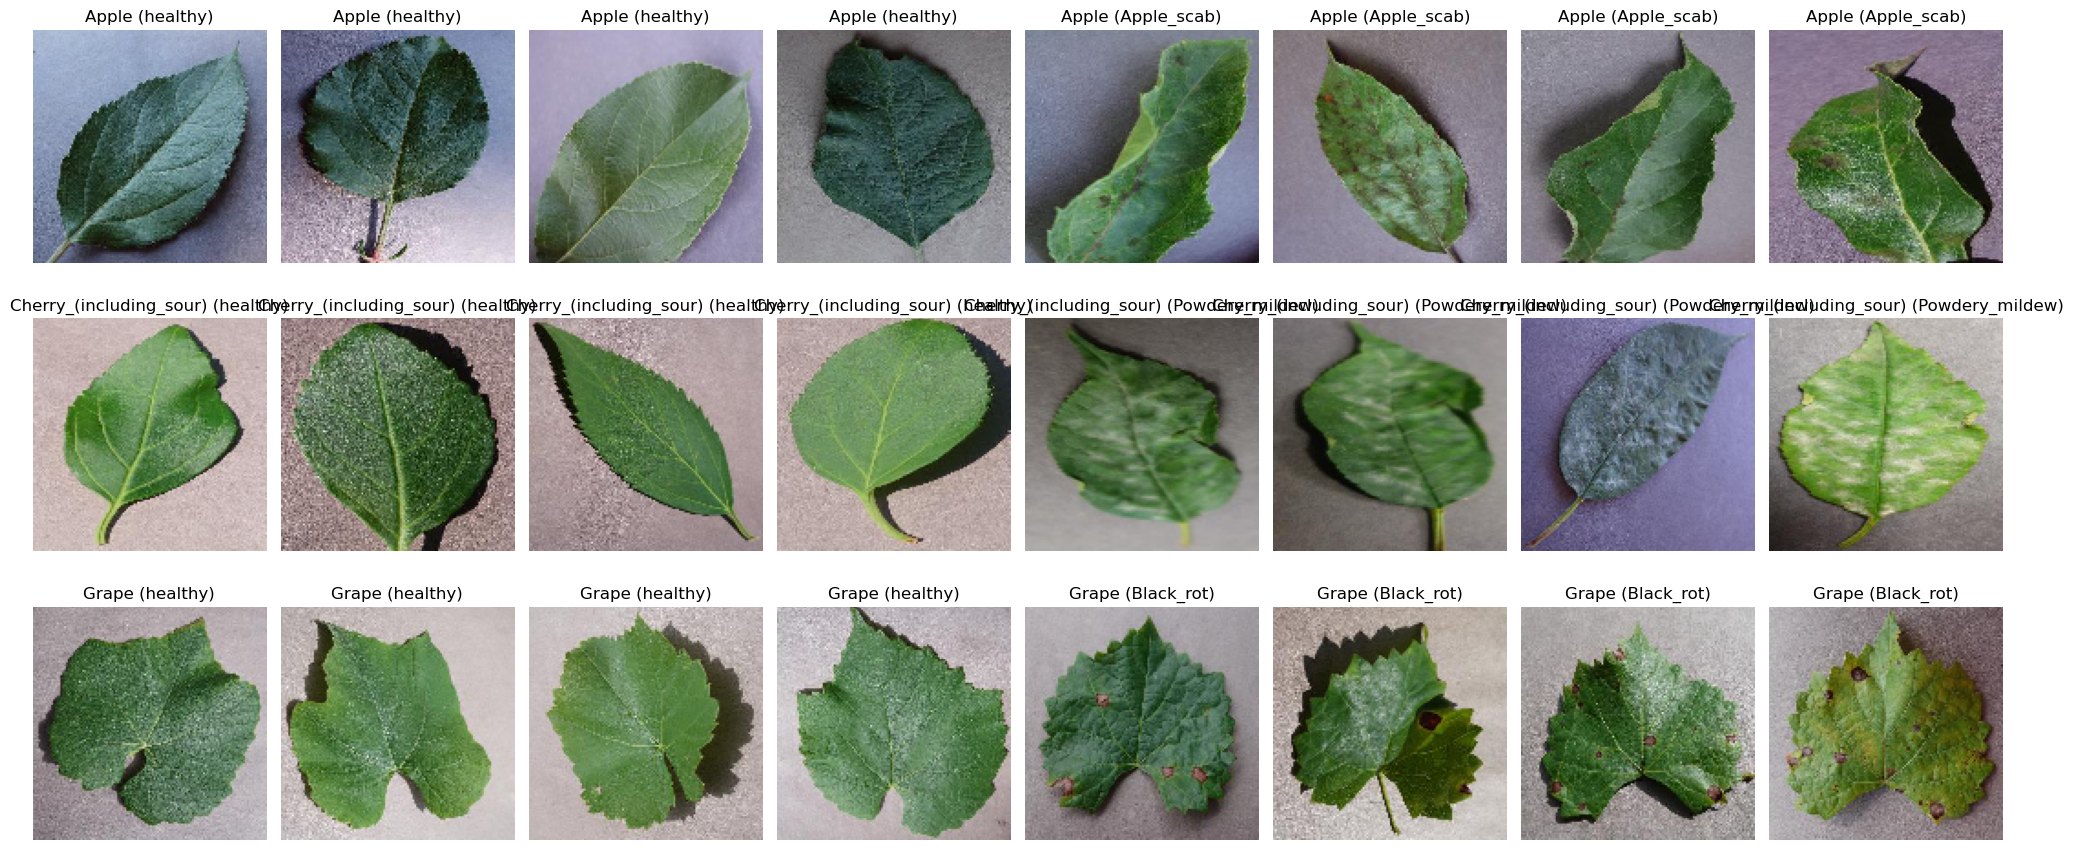


=== Klasyfikacja: Apple___healthy vs Apple___Apple_scab ===

-- Architektura: 1 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5430 - loss: 1.8615 - val_accuracy: 0.8951 - val_loss: 0.3565
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8975 - loss: 0.3076 - val_accuracy: 0.9021 - val_loss: 0.2449
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9499 - loss: 0.1799 - val_accuracy: 0.8916 - val_loss: 0.2546
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9324 - loss: 0.1609 - val_accuracy: 0.9231 - val_loss: 0.1948
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9555 - loss: 0.1412 - val_accuracy: 0.9161 - val_loss: 0.2188
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9503 - loss: 0.1393 - val_accuracy: 0.9161 - val_loss: 0.1762
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9737 - loss: 0.0928 - val_accuracy: 0.9301 - val_loss:

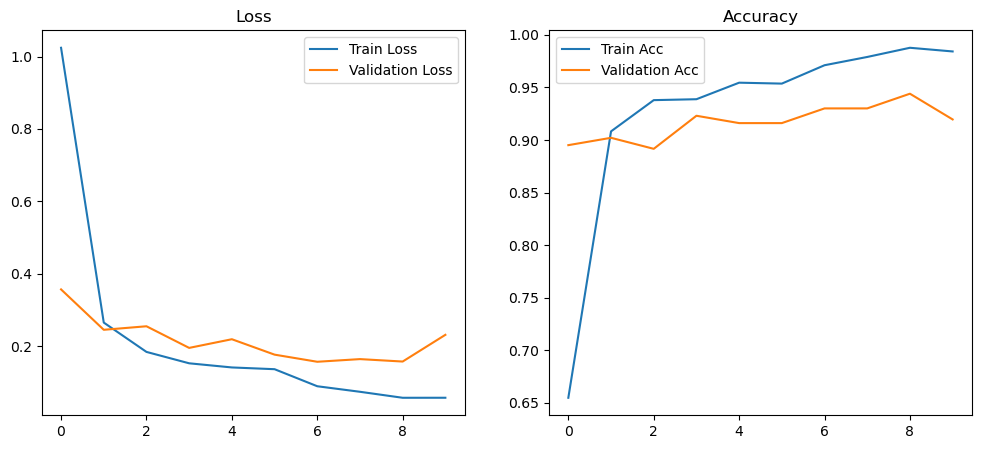

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9196
Precision: 0.9821
Recall   : 0.8397
F1-score : 0.9053

Fold 2/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5649 - loss: 1.7378 - val_accuracy: 0.8916 - val_loss: 0.3291
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9007 - loss: 0.2719 - val_accuracy: 0.9161 - val_loss: 0.1994
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9493 - loss: 0.1452 - val_accuracy: 0.9301 - val_loss: 0.1990
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9675 - loss: 0.1090 - val_accuracy: 0.9231 - val_loss: 0.1869
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9789 - loss: 0.0729 - val_accuracy: 0.9301 - val_loss: 0.2385
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9795 - loss: 0.0757 - val_accuracy: 0.9441 - val_loss: 0.1749
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9953 - loss: 0.0365 - val_accuracy: 0.9336 - val_loss: 0

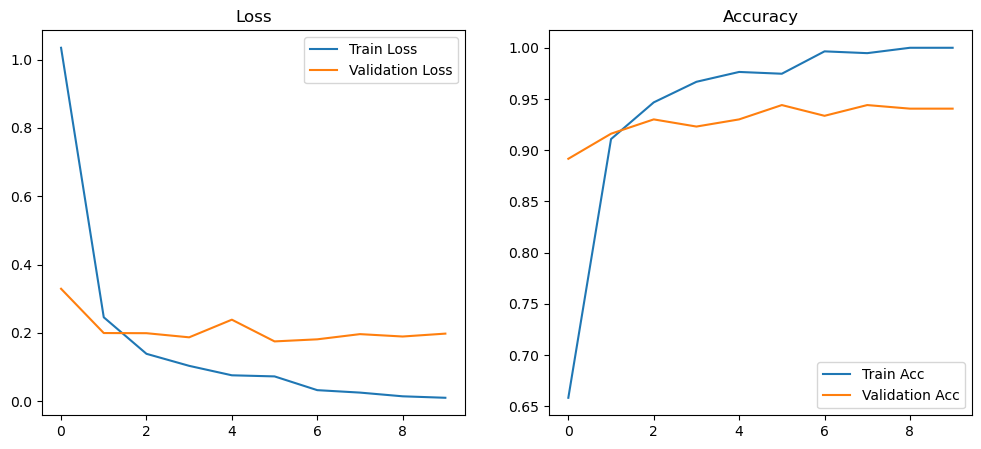

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9406
Precision: 0.9141
Recall   : 0.9512
F1-score : 0.9323

Fold 3/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4952 - loss: 2.0056 - val_accuracy: 0.5909 - val_loss: 0.5858
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5912 - loss: 0.5707 - val_accuracy: 0.9021 - val_loss: 0.5091
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8555 - loss: 0.4817 - val_accuracy: 0.8811 - val_loss: 0.4194
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.8637 - loss: 0.4184 - val_accuracy: 0.9091 - val_loss: 0.3876
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9420 - loss: 0.3874 - val_accuracy: 0.9231 - val_loss: 0.3715
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9366 - loss: 0.3721 - val_accuracy: 0.9091 - val_loss: 0.3761
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9399 - loss: 0.3410 - val_accuracy: 0.9161 - val_loss: 0

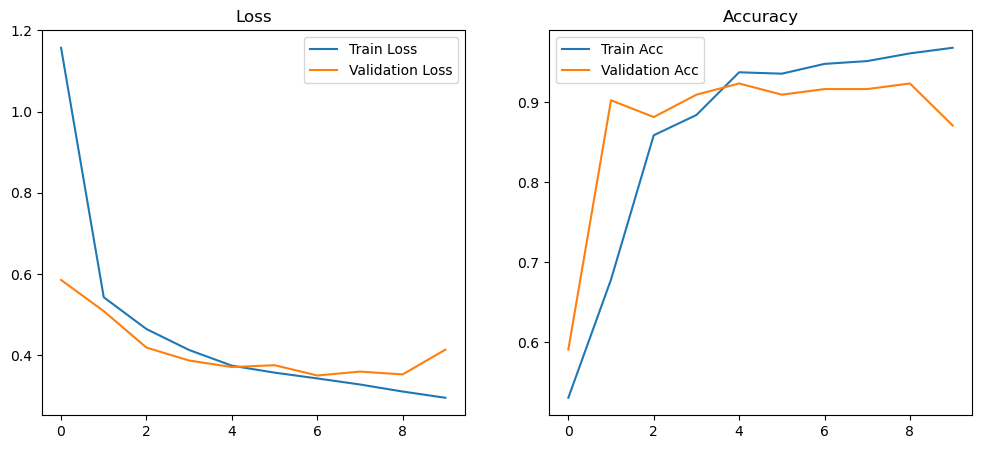

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.8706
Precision: 0.9545
Recall   : 0.7179
F1-score : 0.8195

Fold 4/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5276 - loss: 2.1036 - val_accuracy: 0.5734 - val_loss: 0.6675
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6824 - loss: 0.6187 - val_accuracy: 0.8147 - val_loss: 0.3669
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8548 - loss: 0.3169 - val_accuracy: 0.9266 - val_loss: 0.2058
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9018 - loss: 0.2469 - val_accuracy: 0.9476 - val_loss: 0.1688
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9418 - loss: 0.1579 - val_accuracy: 0.9231 - val_loss: 0.2078
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9481 - loss: 0.1560 - val_accuracy: 0.9510 - val_loss: 0.1524
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9745 - loss: 0.0931 - val_accuracy: 0.9510 - val_loss: 0.

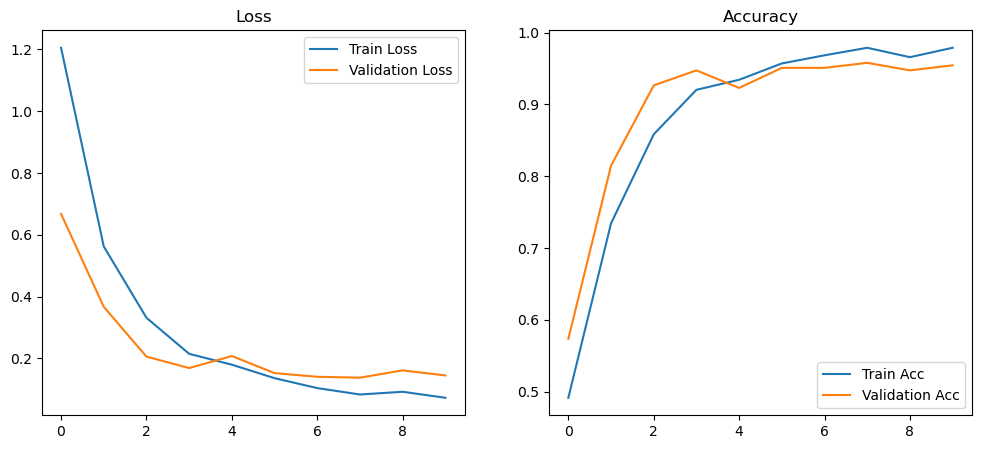

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9545
Precision: 0.9504
Recall   : 0.9426
F1-score : 0.9465

Fold 5/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5736 - loss: 4.4738 - val_accuracy: 0.8287 - val_loss: 0.3714
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8733 - loss: 0.3037 - val_accuracy: 0.8636 - val_loss: 0.3200
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9419 - loss: 0.1641 - val_accuracy: 0.9126 - val_loss: 0.1875
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9809 - loss: 0.0674 - val_accuracy: 0.9371 - val_loss: 0.1590
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9936 - loss: 0.0367 - val_accuracy: 0.9406 - val_loss: 0.1501
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9986 - loss: 0.0174 - val_accuracy: 0.9336 - val_loss: 0.1478
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.9406 - val_loss: 0.

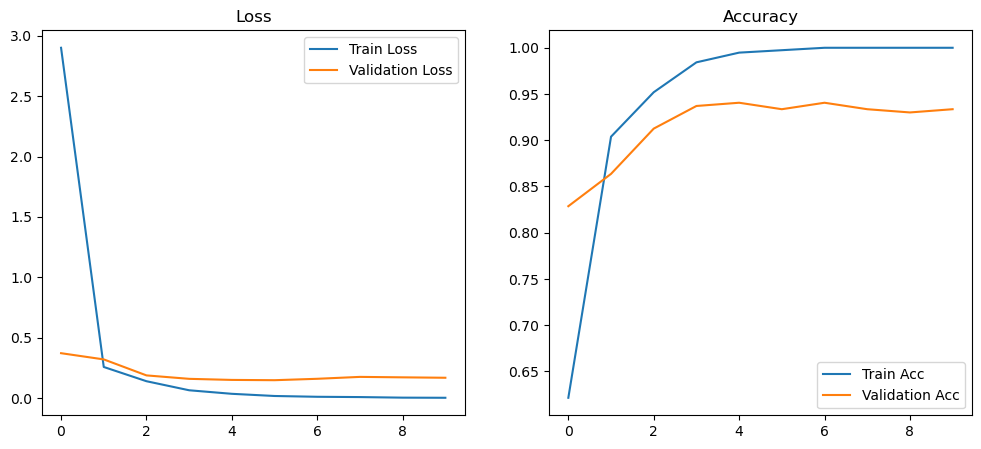

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9336
Precision: 0.9470
Recall   : 0.9124
F1-score : 0.9294

-- Architektura: 1 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.6342 - loss: 2.5023 - val_accuracy: 0.9021 - val_loss: 0.2561
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9158 - loss: 0.2170 - val_accuracy: 0.9196 - val_loss: 0.1960
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9686 - loss: 0.1110 - val_accuracy: 0.9266 - val_loss: 0.2021
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9594 - loss: 0.0926 - val_accuracy: 0.9336 - val_loss: 0.1777
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9922 - loss: 0.0416 - val_accuracy: 0.9406 - val_loss: 0.1803
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9976 - loss: 0.0230 - val_accuracy: 0.9231 - val_loss: 0.2028
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9899 - 

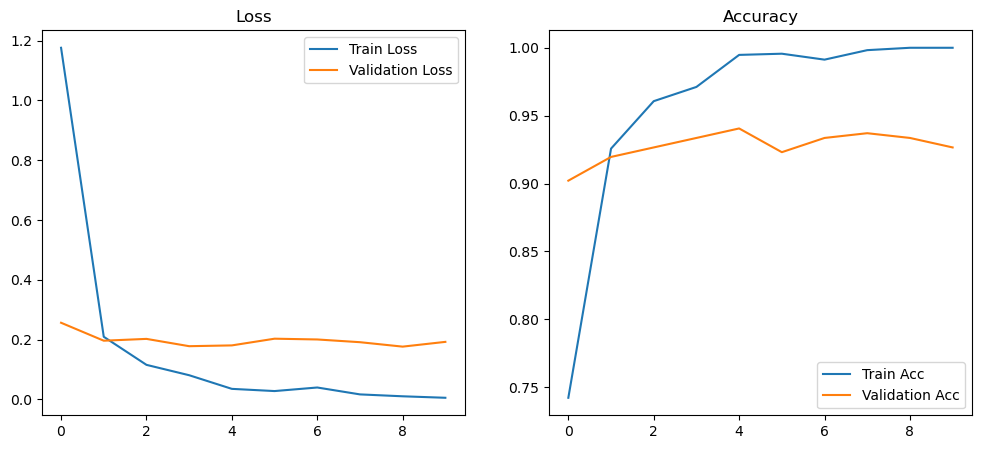

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9266
Precision: 0.9297
Recall   : 0.9084
F1-score : 0.9189

Fold 2/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5684 - loss: 1.2624 - val_accuracy: 0.9126 - val_loss: 0.4161
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8615 - loss: 0.3701 - val_accuracy: 0.9266 - val_loss: 0.2456
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9017 - loss: 0.2451 - val_accuracy: 0.9301 - val_loss: 0.2133
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9442 - loss: 0.1512 - val_accuracy: 0.9266 - val_loss: 0.1969
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9681 - loss: 0.1110 - val_accuracy: 0.9406 - val_loss: 0.1536
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9770 - loss: 0.0896 - val_accuracy: 0.9476 - val_loss: 0.1503
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9824 - loss: 0.0662 - val_accuracy: 0.9336 - val_l

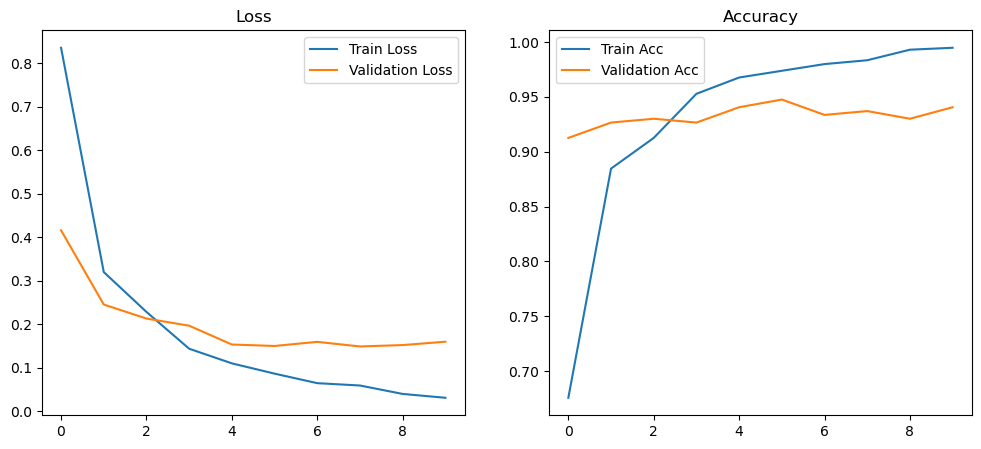

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9406
Precision: 0.9206
Recall   : 0.9431
F1-score : 0.9317

Fold 3/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.5377 - loss: 1.6058 - val_accuracy: 0.8671 - val_loss: 0.4349
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8900 - loss: 0.3714 - val_accuracy: 0.9021 - val_loss: 0.2534
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9293 - loss: 0.2191 - val_accuracy: 0.8986 - val_loss: 0.2450
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9649 - loss: 0.1473 - val_accuracy: 0.9161 - val_loss: 0.2229
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9597 - loss: 0.1264 - val_accuracy: 0.9196 - val_loss: 0.2235
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9667 - loss: 0.0933 - val_accuracy: 0.8881 - val_loss: 0.3584
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9666 - loss: 0.0940 - val_accuracy: 0.9371 - val_l

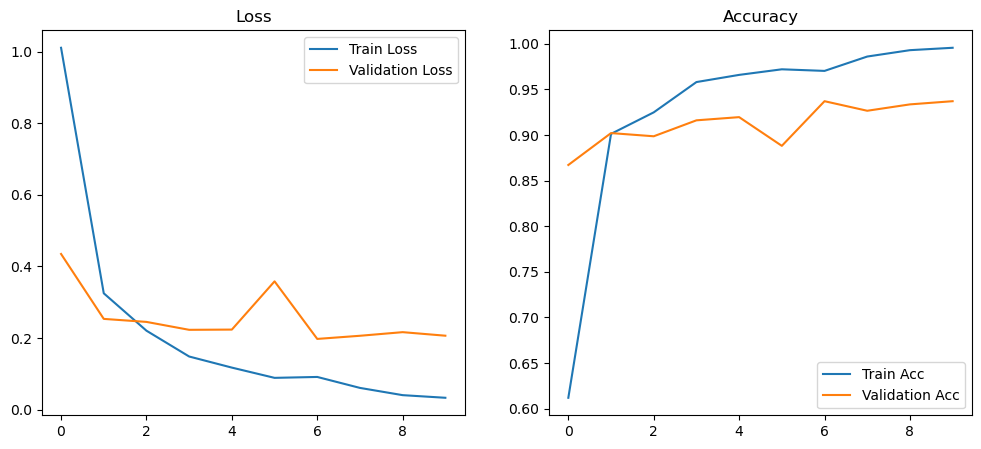

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9371
Precision: 0.9231
Recall   : 0.9231
F1-score : 0.9231

Fold 4/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5862 - loss: 0.8714 - val_accuracy: 0.9336 - val_loss: 0.2028
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9211 - loss: 0.2207 - val_accuracy: 0.9301 - val_loss: 0.2014
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9509 - loss: 0.1377 - val_accuracy: 0.9406 - val_loss: 0.1766
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9832 - loss: 0.0714 - val_accuracy: 0.9161 - val_loss: 0.2178
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9676 - loss: 0.0798 - val_accuracy: 0.9476 - val_loss: 0.1428
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9921 - loss: 0.0347 - val_accuracy: 0.9510 - val_loss: 0.1481
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.9476 - val_l

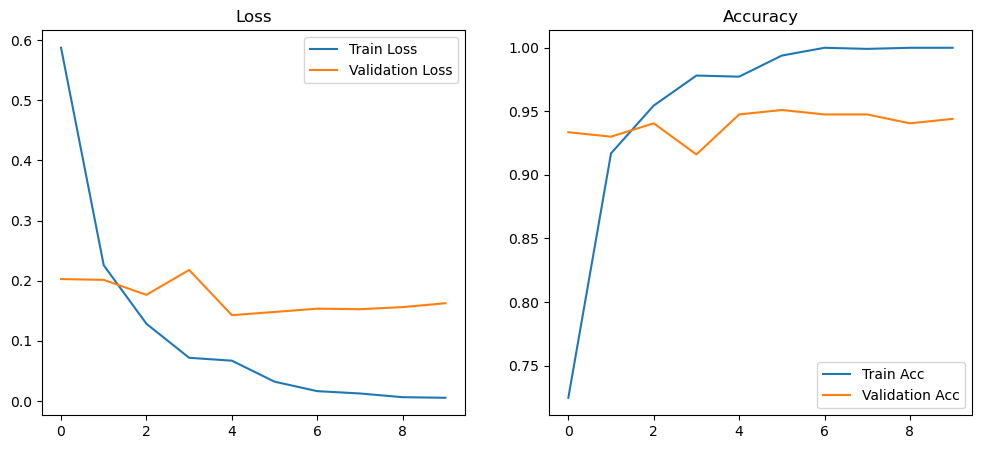

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9441
Precision: 0.9206
Recall   : 0.9508
F1-score : 0.9355

Fold 5/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5456 - loss: 2.6406 - val_accuracy: 0.8671 - val_loss: 0.3885
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9016 - loss: 0.2975 - val_accuracy: 0.8986 - val_loss: 0.2212
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9303 - loss: 0.1786 - val_accuracy: 0.9266 - val_loss: 0.1891
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9705 - loss: 0.0869 - val_accuracy: 0.9406 - val_loss: 0.1541
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9930 - loss: 0.0442 - val_accuracy: 0.9196 - val_loss: 0.1910
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9934 - loss: 0.0410 - val_accuracy: 0.9545 - val_loss: 0.1403
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9985 - loss: 0.0182 - val_accuracy: 0.9580 - val_l

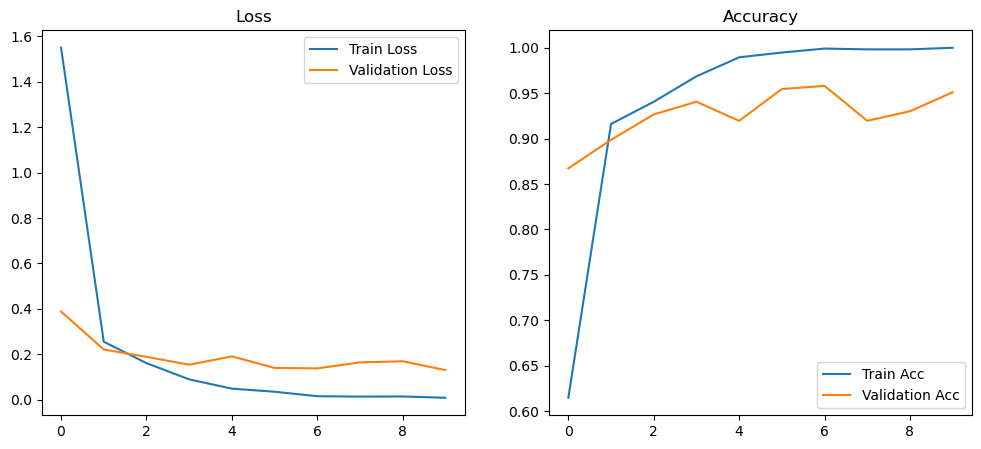

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9510
Precision: 0.9424
Recall   : 0.9562
F1-score : 0.9493

-- Architektura: 2 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.5794 - loss: 0.8375 - val_accuracy: 0.8811 - val_loss: 0.2862
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9174 - loss: 0.2444 - val_accuracy: 0.9021 - val_loss: 0.2506
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9041 - loss: 0.2355 - val_accuracy: 0.8986 - val_loss: 0.2402
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9331 - loss: 0.1690 - val_accuracy: 0.9301 - val_loss: 0.1822
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9490 - loss: 0.1549 - val_accuracy: 0.9406 - val_loss: 0.1870
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9471 - loss: 0.1460 - val_accuracy: 0.9091 - val_loss: 0.2470
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9597 - 

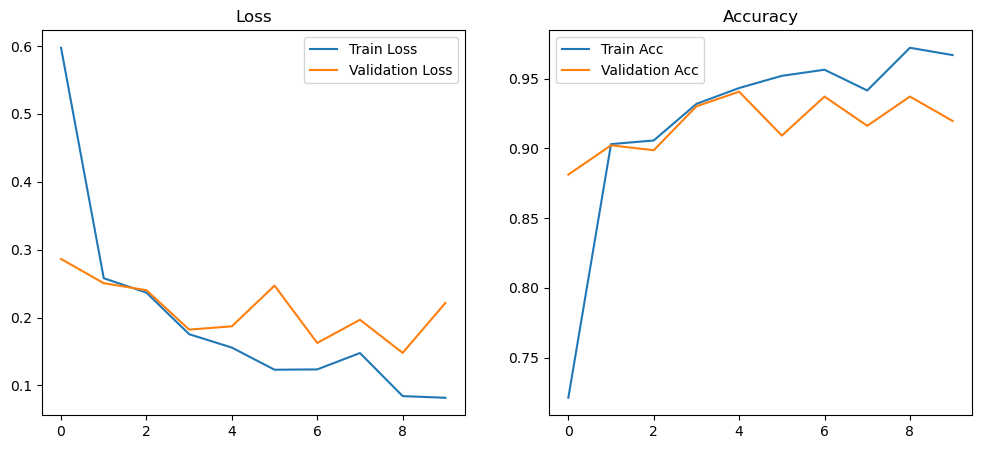

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9196
Precision: 0.9655
Recall   : 0.8550
F1-score : 0.9069

Fold 2/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.5444 - loss: 0.6986 - val_accuracy: 0.8706 - val_loss: 0.3496
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8609 - loss: 0.3467 - val_accuracy: 0.9371 - val_loss: 0.2238
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9263 - loss: 0.2195 - val_accuracy: 0.9406 - val_loss: 0.1984
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9351 - loss: 0.1793 - val_accuracy: 0.9301 - val_loss: 0.2166
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9487 - loss: 0.1465 - val_accuracy: 0.9161 - val_loss: 0.2453
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9563 - loss: 0.1277 - val_accuracy: 0.9510 - val_loss: 0.1763
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9731 - loss: 0.0938 - val_accuracy: 0.9510 - val_l

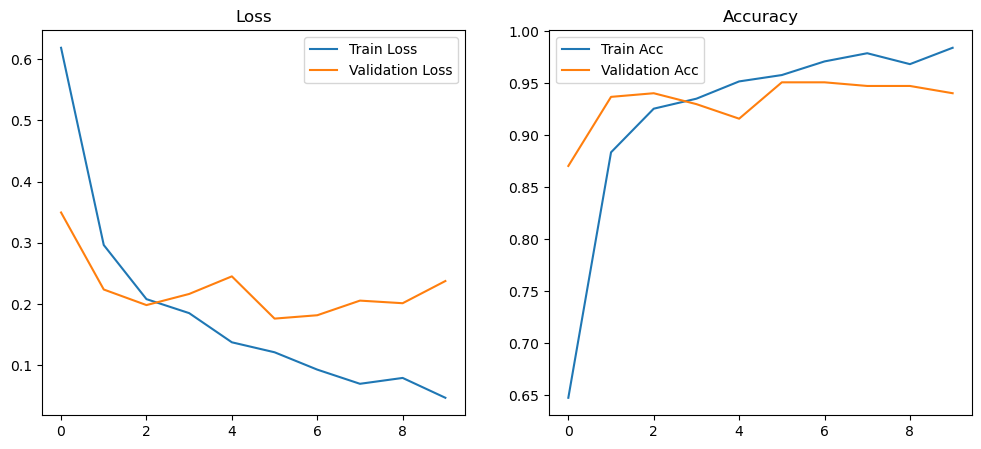

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9406
Precision: 0.8955
Recall   : 0.9756
F1-score : 0.9339

Fold 3/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.5605 - loss: 0.9095 - val_accuracy: 0.7448 - val_loss: 0.5025
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.8172 - loss: 0.4327 - val_accuracy: 0.8811 - val_loss: 0.3584
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9071 - loss: 0.2836 - val_accuracy: 0.9336 - val_loss: 0.1980
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9506 - loss: 0.1762 - val_accuracy: 0.9021 - val_loss: 0.3148
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9260 - loss: 0.1866 - val_accuracy: 0.9371 - val_loss: 0.1807
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9542 - loss: 0.1321 - val_accuracy: 0.9266 - val_loss: 0.1988
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9714 - loss: 0.0976 - val_accuracy: 0.9406 - val_l

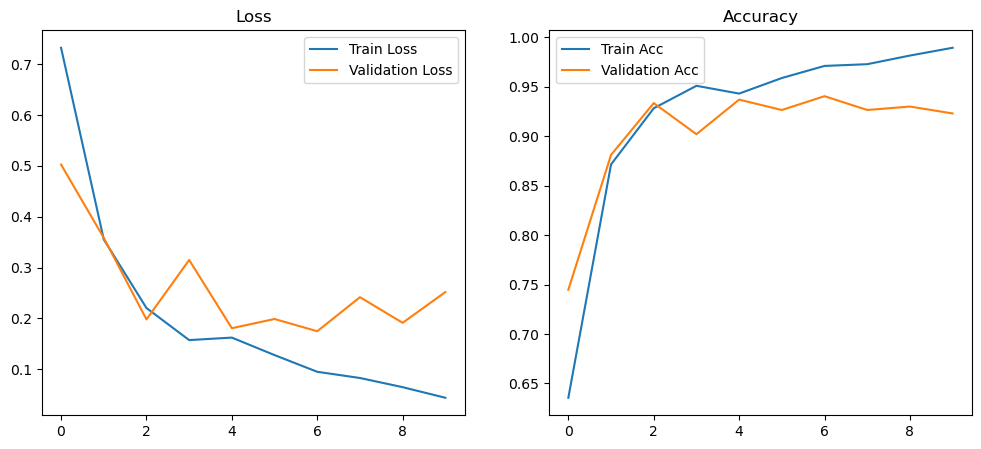

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9231
Precision: 0.8626
Recall   : 0.9658
F1-score : 0.9113

Fold 4/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.4433 - loss: 1.0524 - val_accuracy: 0.5734 - val_loss: 0.6730
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.5745 - loss: 0.6421 - val_accuracy: 0.9021 - val_loss: 0.3856
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8520 - loss: 0.3765 - val_accuracy: 0.9336 - val_loss: 0.2086
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9166 - loss: 0.2295 - val_accuracy: 0.9476 - val_loss: 0.1635
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9161 - loss: 0.2024 - val_accuracy: 0.9545 - val_loss: 0.1532
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9555 - loss: 0.1291 - val_accuracy: 0.8636 - val_loss: 0.3845
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9094 - loss: 0.2017 - val_accuracy: 0.9476 - val_l

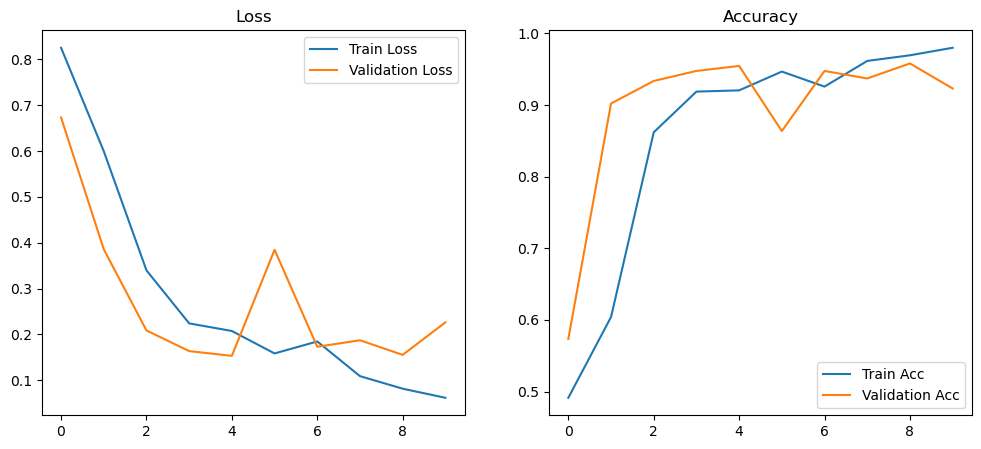

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9231
Precision: 0.9545
Recall   : 0.8607
F1-score : 0.9052

Fold 5/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.5642 - loss: 0.9257 - val_accuracy: 0.8706 - val_loss: 0.3427
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.8881 - loss: 0.2885 - val_accuracy: 0.9266 - val_loss: 0.2118
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9125 - loss: 0.2278 - val_accuracy: 0.8951 - val_loss: 0.2378
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9096 - loss: 0.2198 - val_accuracy: 0.9196 - val_loss: 0.1962
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9356 - loss: 0.1734 - val_accuracy: 0.9301 - val_loss: 0.1778
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9329 - loss: 0.1778 - val_accuracy: 0.8811 - val_loss: 0.2487
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9455 - loss: 0.1529 - val_accuracy: 0.9161 - val_l

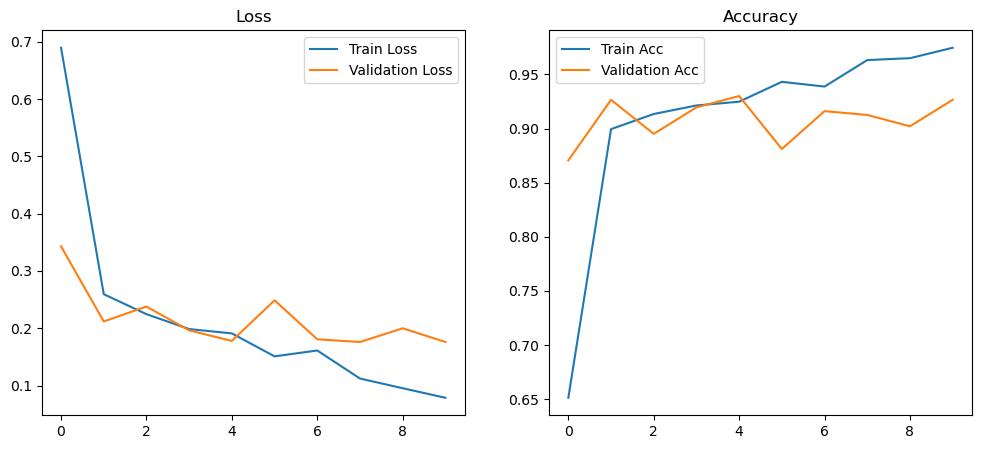

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9266
Precision: 0.8816
Recall   : 0.9781
F1-score : 0.9273

-- Architektura: 2 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.6202 - loss: 0.6776 - val_accuracy: 0.9196 - val_loss: 0.2266
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9082 - loss: 0.2222 - val_accuracy: 0.9196 - val_loss: 0.2128
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9124 - loss: 0.2098 - val_accuracy: 0.9196 - val_loss: 0.2300
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9354 - loss: 0.1855 - val_accuracy: 0.9406 - val_loss: 0.1655
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9514 - loss: 0.1591 - val_accuracy: 0.9196 - val_loss: 0.2142
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9373 - loss: 0.1776 - val_accuracy: 0.9476 - val_loss: 0.1749
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9498 - 

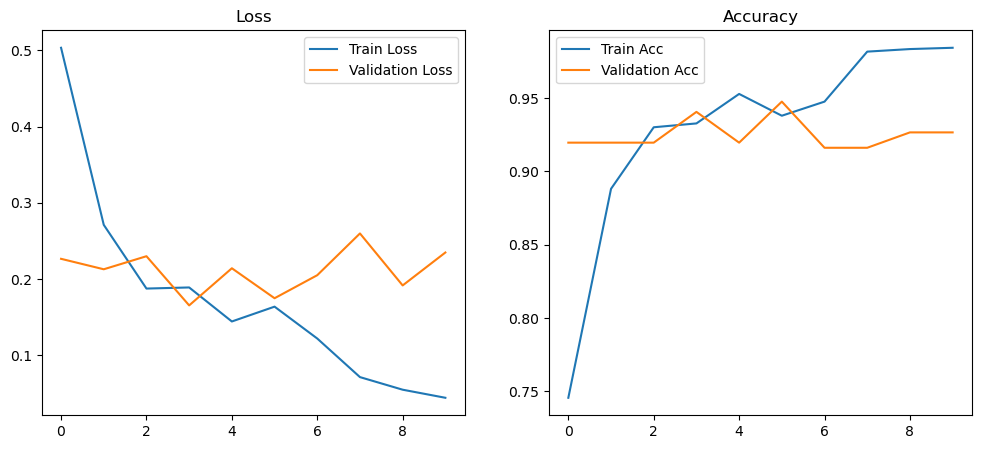

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9266
Precision: 0.8873
Recall   : 0.9618
F1-score : 0.9231

Fold 2/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.5413 - loss: 0.8762 - val_accuracy: 0.7448 - val_loss: 0.5123
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.7944 - loss: 0.4548 - val_accuracy: 0.8951 - val_loss: 0.2690
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9019 - loss: 0.2350 - val_accuracy: 0.9231 - val_loss: 0.2259
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9282 - loss: 0.2152 - val_accuracy: 0.9301 - val_loss: 0.2122
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9569 - loss: 0.1302 - val_accuracy: 0.9126 - val_loss: 0.2095
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9750 - loss: 0.0886 - val_accuracy: 0.9441 - val_loss: 0.2124
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9771 - loss: 0.0651 - val_accuracy: 0.9371 - val_l

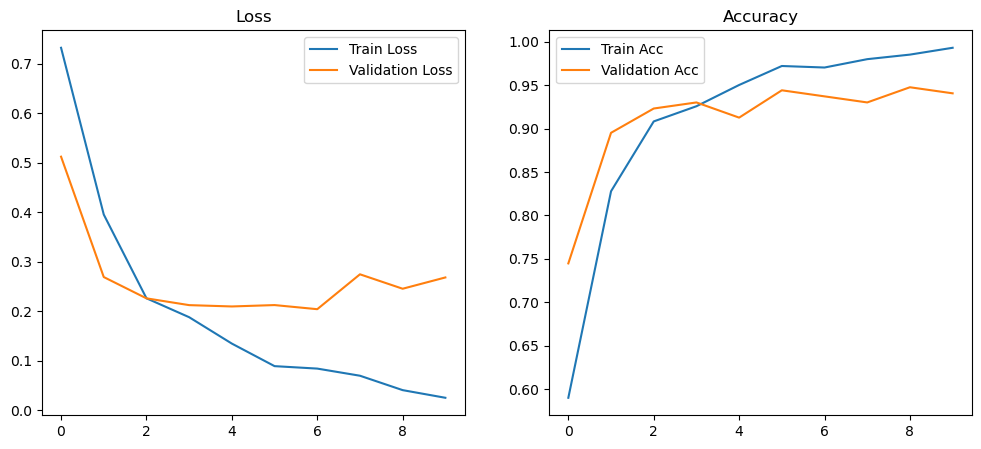

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9406
Precision: 0.9344
Recall   : 0.9268
F1-score : 0.9306

Fold 3/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.6036 - loss: 0.7393 - val_accuracy: 0.8951 - val_loss: 0.2961
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9166 - loss: 0.2206 - val_accuracy: 0.9301 - val_loss: 0.2006
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.9400 - loss: 0.1607 - val_accuracy: 0.9266 - val_loss: 0.2096
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9542 - loss: 0.1427 - val_accuracy: 0.9406 - val_loss: 0.1856
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9643 - loss: 0.1118 - val_accuracy: 0.8881 - val_loss: 0.3345
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.9403 - loss: 0.1469 - val_accuracy: 0.9231 - val_loss: 0.2268
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.9827 - loss: 0.0616 - val_accuracy: 0.9336 - val_l

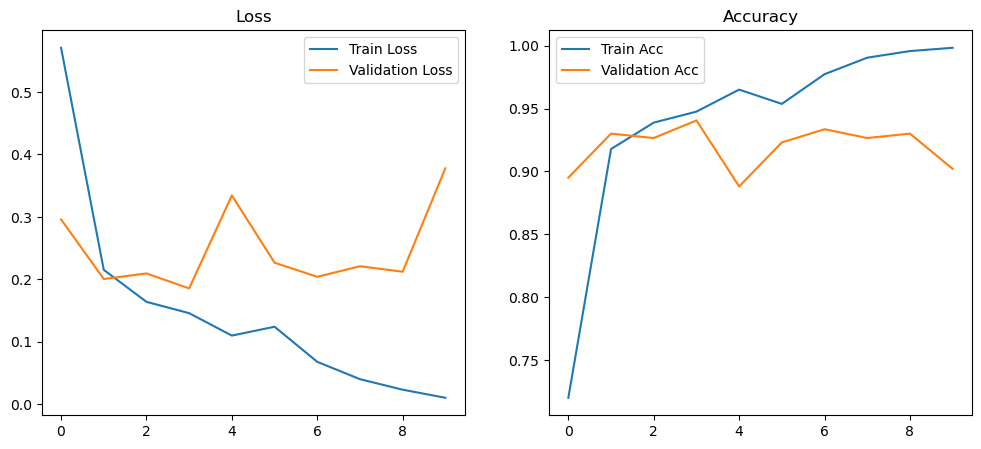

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9021
Precision: 0.9406
Recall   : 0.8120
F1-score : 0.8716

Fold 4/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7042 - loss: 0.6909 - val_accuracy: 0.9441 - val_loss: 0.1778
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9164 - loss: 0.2322 - val_accuracy: 0.9301 - val_loss: 0.1994
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.9440 - loss: 0.1714 - val_accuracy: 0.9545 - val_loss: 0.1457
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9306 - loss: 0.1829 - val_accuracy: 0.9161 - val_loss: 0.2063
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.9507 - loss: 0.1373 - val_accuracy: 0.9580 - val_loss: 0.1642
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.9656 - loss: 0.1003 - val_accuracy: 0.9441 - val_loss: 0.1667
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9620 - loss: 0.0931 - val_accuracy: 0.9545 - val_l

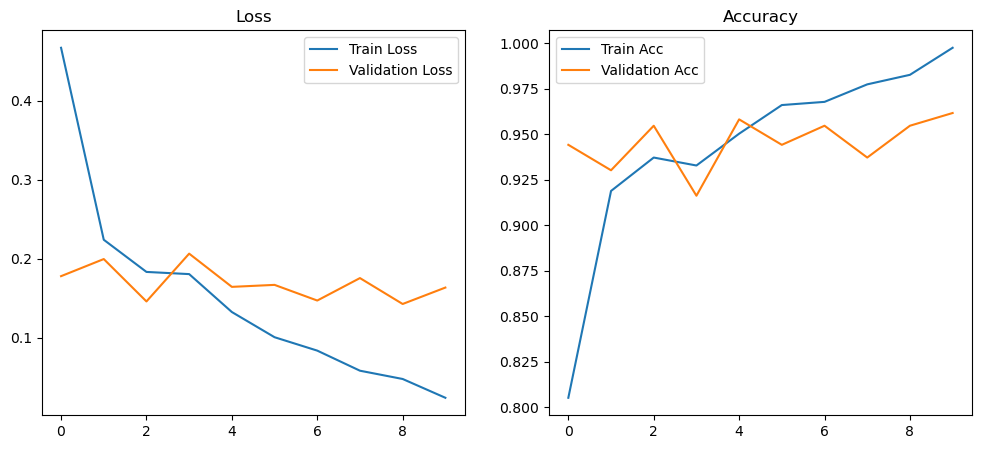

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9615
Precision: 0.9440
Recall   : 0.9672
F1-score : 0.9555

Fold 5/5
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.6280 - loss: 0.6882 - val_accuracy: 0.8217 - val_loss: 0.4397
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.8600 - loss: 0.3628 - val_accuracy: 0.9126 - val_loss: 0.1956
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.8923 - loss: 0.2510 - val_accuracy: 0.8846 - val_loss: 0.2548
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9311 - loss: 0.1585 - val_accuracy: 0.9126 - val_loss: 0.1972
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9508 - loss: 0.1372 - val_accuracy: 0.9056 - val_loss: 0.2726
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9494 - loss: 0.1288 - val_accuracy: 0.9406 - val_loss: 0.1694
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9301 - val_l

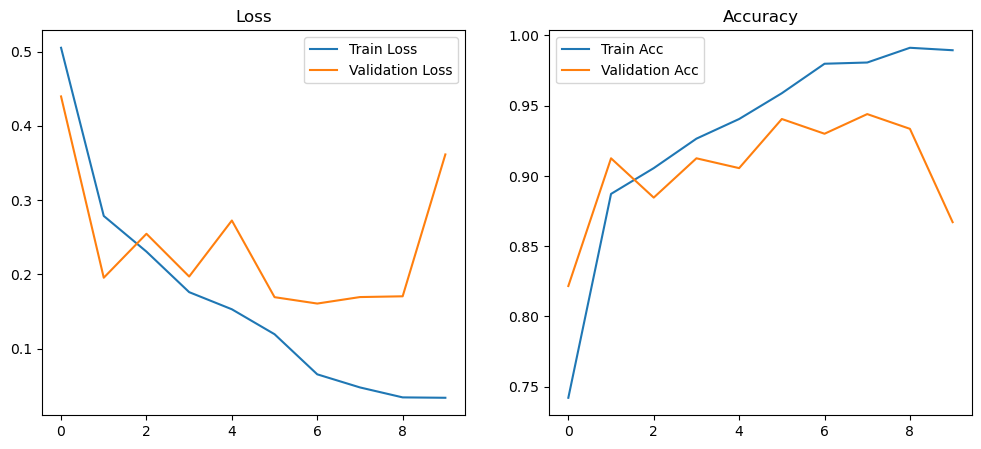

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.8671
Precision: 0.7895
Recall   : 0.9854
F1-score : 0.8766

=== Klasyfikacja: Cherry_(including_sour)___healthy vs Cherry_(including_sour)___Powdery_mildew ===

-- Architektura: 1 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5226 - loss: 1.7184 - val_accuracy: 0.4656 - val_loss: 0.6935
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4945 - loss: 0.6932 - val_accuracy: 0.4656 - val_loss: 0.6936
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.4888 - loss: 0.6933 - val_accuracy: 0.4656 - val_loss: 0.6936
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5259 - loss: 0.6929 - val_accuracy: 0.4656 - val_loss: 0.6937
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.4656 - val_loss: 0.6937
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy:

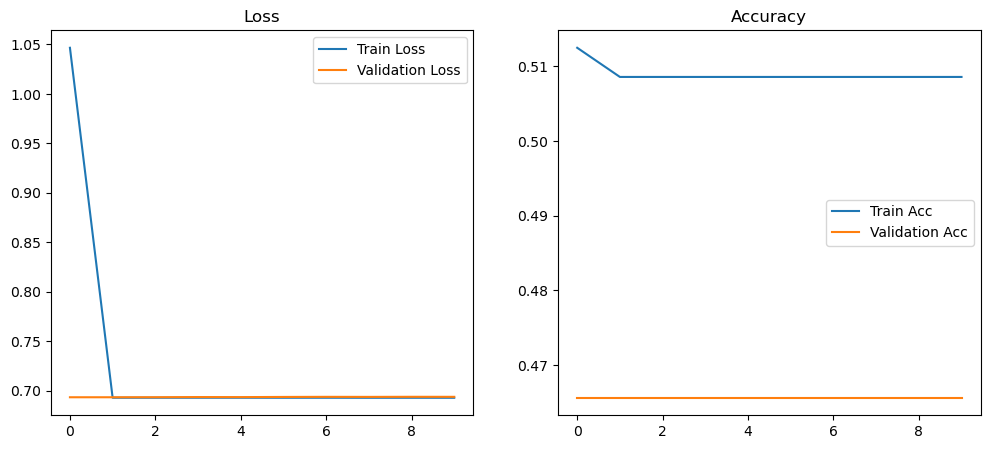

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.4656
Precision: 0.4656
Recall   : 1.0000
F1-score : 0.6354

Fold 2/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4901 - loss: 1.0204 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5126 - loss: 0.6917 - val_accuracy: 0.8000 - val_loss: 0.5448
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.7592 - loss: 0.5357 - val_accuracy: 0.7875 - val_loss: 0.4436
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9365 - loss: 0.3202 - val_accuracy: 0.9500 - val_loss: 0.1379
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9522 - loss: 0.1551 - val_accuracy: 0.9875 - val_loss: 0.0583
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9902 - loss: 0.0614 - val_accuracy: 0.9937 - val_loss: 0.0433
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9965 - loss: 0.0376 - val_accuracy: 0.9937 - val_loss: 0

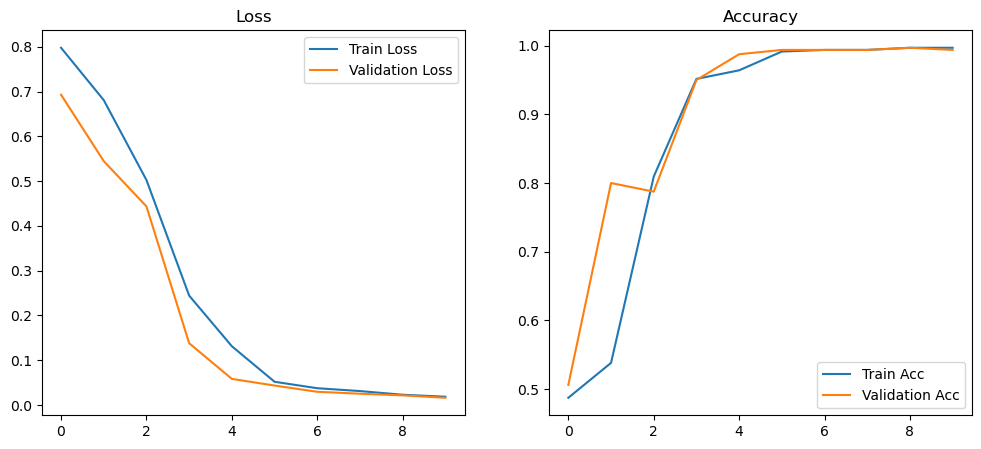

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9938
Precision: 0.9938
Recall   : 0.9938
F1-score : 0.9938

Fold 3/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5400 - loss: 2.1402 - val_accuracy: 0.9500 - val_loss: 0.2362
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9569 - loss: 0.1658 - val_accuracy: 0.8750 - val_loss: 0.2563
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9321 - loss: 0.1679 - val_accuracy: 0.9906 - val_loss: 0.0665
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9976 - loss: 0.0307 - val_accuracy: 0.9875 - val_loss: 0.0506
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9969 - loss: 0.0142 - val_accuracy: 0.9563 - val_loss: 0.1406
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9985 - loss: 0.0188 - val_accuracy: 0.9875 - val_loss: 0.0550
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9937 - val_loss: 0

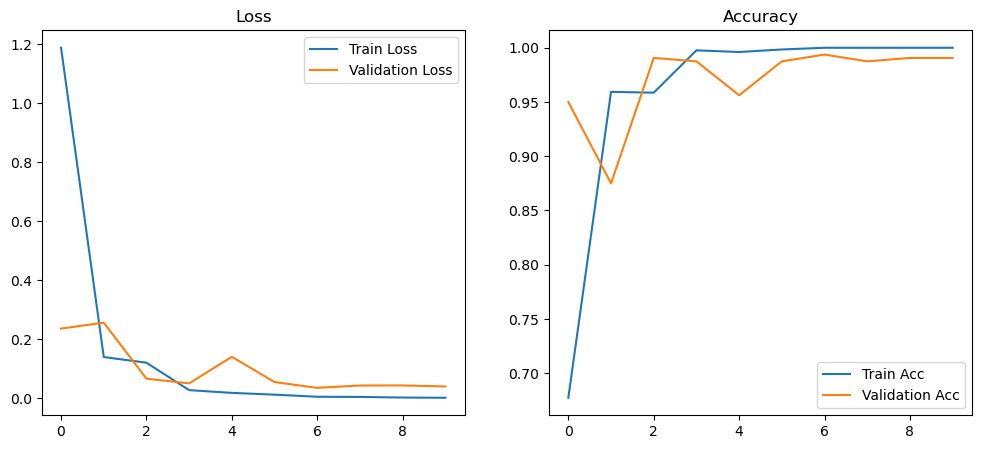

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9906
Precision: 1.0000
Recall   : 0.9801
F1-score : 0.9900

Fold 4/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7116 - loss: 1.2078 - val_accuracy: 0.9906 - val_loss: 0.1015
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9897 - loss: 0.0688 - val_accuracy: 0.9937 - val_loss: 0.0338
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9991 - loss: 0.0182 - val_accuracy: 0.9937 - val_loss: 0.0252
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.9937 - val_loss: 0.0229
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9937 - val_loss: 0.0238
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9937 - val_loss: 0.0279
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9937 - val_loss: 

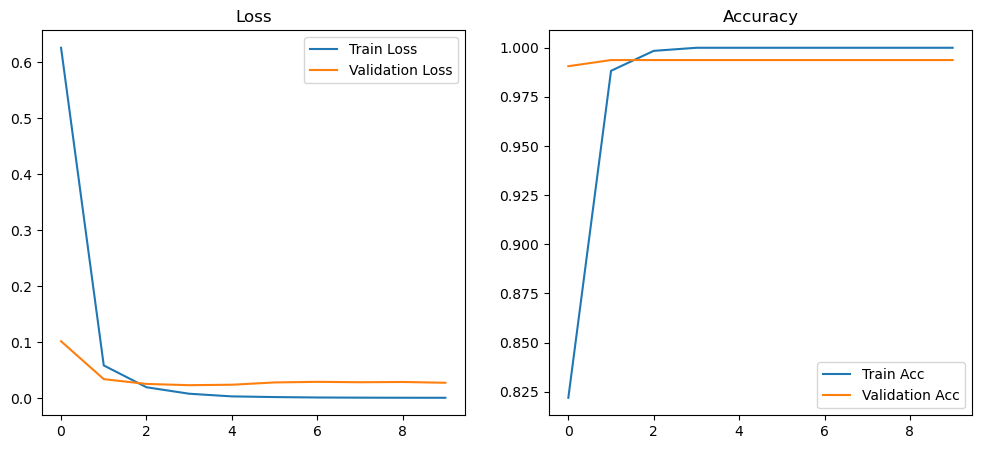

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9938
Precision: 0.9940
Recall   : 0.9940
F1-score : 0.9940

Fold 5/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5837 - loss: 1.9919 - val_accuracy: 0.9875 - val_loss: 0.1246
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9801 - loss: 0.0933 - val_accuracy: 0.9906 - val_loss: 0.0620
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9945 - loss: 0.0436 - val_accuracy: 0.9937 - val_loss: 0.0420
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9923 - loss: 0.0322 - val_accuracy: 0.9937 - val_loss: 0.0316
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9975 - loss: 0.0111 - val_accuracy: 0.9937 - val_loss: 0.0299
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9937 - val_loss: 0.0248
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9937 - val_loss: 0

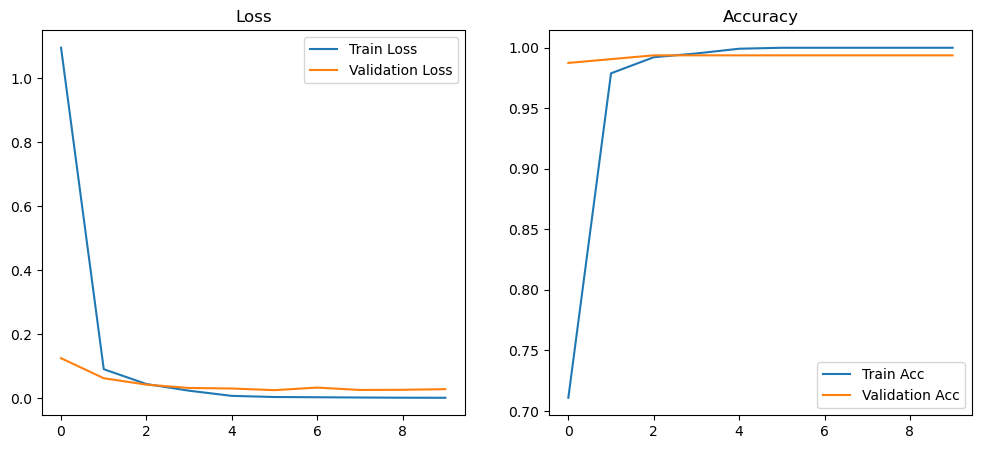

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9938
Precision: 1.0000
Recall   : 0.9884
F1-score : 0.9942

-- Architektura: 1 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.5536 - loss: 1.6835 - val_accuracy: 0.8719 - val_loss: 0.4495
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9143 - loss: 0.3551 - val_accuracy: 0.9812 - val_loss: 0.1371
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9812 - loss: 0.0927 - val_accuracy: 0.9844 - val_loss: 0.0718
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9940 - loss: 0.0356 - val_accuracy: 0.9937 - val_loss: 0.0615
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9985 - loss: 0.0229 - val_accuracy: 0.9937 - val_loss: 0.0525
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9977 - loss: 0.0168 - val_accuracy: 0.9875 - val_loss: 0.0422
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 1.0000 - 

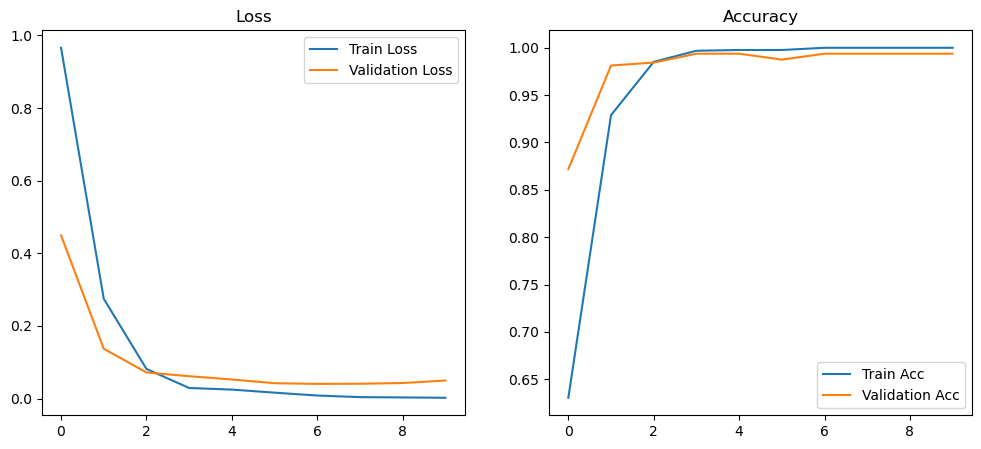

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9938
Precision: 1.0000
Recall   : 0.9866
F1-score : 0.9932

Fold 2/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.6295 - loss: 1.6168 - val_accuracy: 0.9750 - val_loss: 0.2301
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9811 - loss: 0.1478 - val_accuracy: 0.9969 - val_loss: 0.0367
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9639 - loss: 0.0965 - val_accuracy: 0.9969 - val_loss: 0.0240
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9987 - loss: 0.0189 - val_accuracy: 0.9937 - val_loss: 0.0187
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9998 - loss: 0.0118 - val_accuracy: 0.9937 - val_loss: 0.0228
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9969 - val_loss: 0.0156
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9969 - val_l

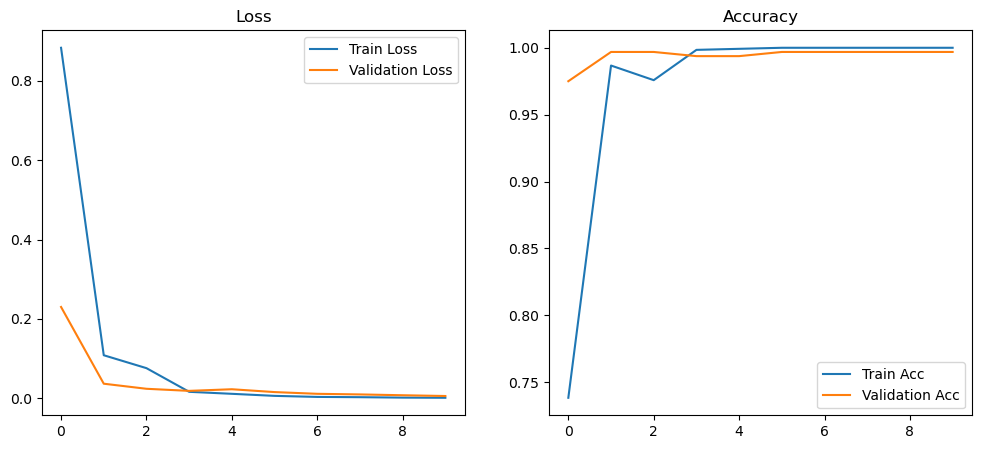

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9938
F1-score : 0.9969

Fold 3/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.5566 - loss: 2.7318 - val_accuracy: 0.7656 - val_loss: 0.4719
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9025 - loss: 0.3547 - val_accuracy: 0.9531 - val_loss: 0.1739
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9870 - loss: 0.1016 - val_accuracy: 0.9875 - val_loss: 0.0866
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9932 - loss: 0.0414 - val_accuracy: 0.9812 - val_loss: 0.0778
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9937 - loss: 0.0322 - val_accuracy: 0.9625 - val_loss: 0.1179
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9967 - loss: 0.0153 - val_accuracy: 0.9875 - val_loss: 0.0367
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9875 - val_l

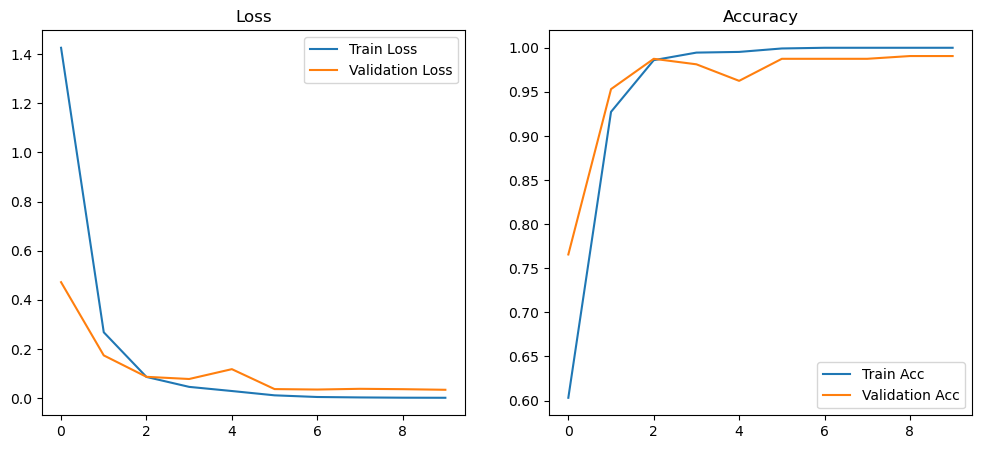

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9906
Precision: 1.0000
Recall   : 0.9801
F1-score : 0.9900

Fold 4/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5512 - loss: 2.3266 - val_accuracy: 0.9625 - val_loss: 0.3257
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9399 - loss: 0.2530 - val_accuracy: 0.9812 - val_loss: 0.1202
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9826 - loss: 0.0965 - val_accuracy: 0.9906 - val_loss: 0.0660
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9947 - loss: 0.0410 - val_accuracy: 0.9906 - val_loss: 0.0522
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9975 - loss: 0.0207 - val_accuracy: 0.9937 - val_loss: 0.0417
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9985 - loss: 0.0154 - val_accuracy: 0.9906 - val_loss: 0.0375
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9981 - loss: 0.0184 - val_accuracy: 0.9906 - val_l

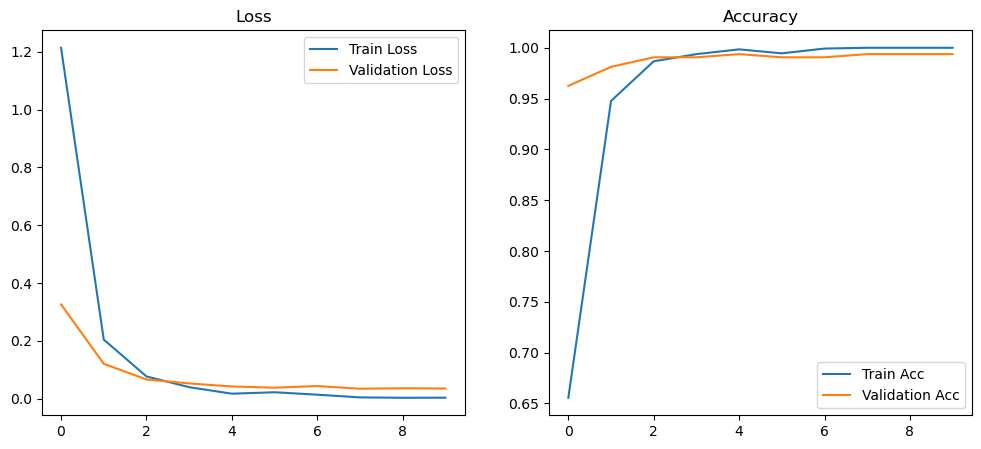

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9938
Precision: 0.9940
Recall   : 0.9940
F1-score : 0.9940

Fold 5/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.5801 - loss: 1.8100 - val_accuracy: 0.8250 - val_loss: 0.4933
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9101 - loss: 0.3474 - val_accuracy: 0.9688 - val_loss: 0.1232
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9706 - loss: 0.1138 - val_accuracy: 0.9875 - val_loss: 0.0672
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9888 - loss: 0.0517 - val_accuracy: 0.9906 - val_loss: 0.0583
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.9970 - loss: 0.0247 - val_accuracy: 0.9906 - val_loss: 0.0446
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9972 - loss: 0.0193 - val_accuracy: 0.9937 - val_loss: 0.0362
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9967 - loss: 0.0144 - val_accuracy: 0.9906 - val_l

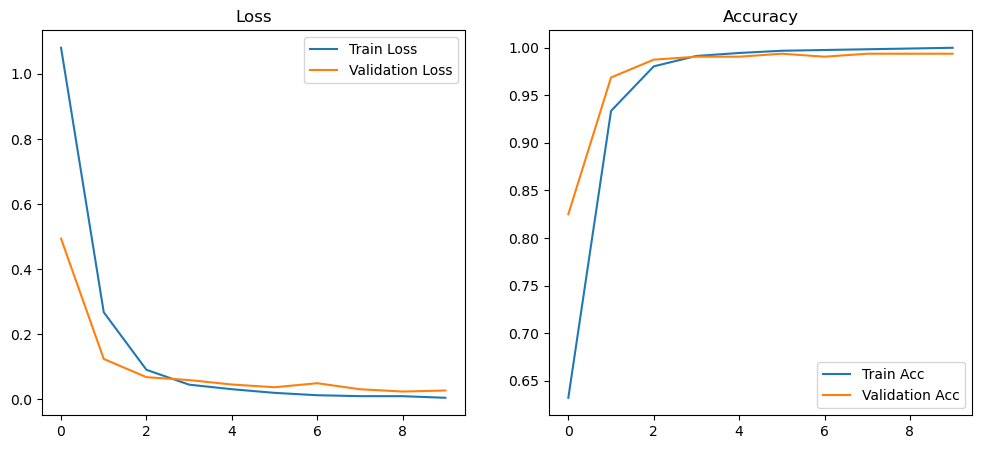

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9938
Precision: 1.0000
Recall   : 0.9884
F1-score : 0.9942

-- Architektura: 2 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4884 - loss: 0.7065 - val_accuracy: 0.4656 - val_loss: 0.5714
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.8441 - loss: 0.4950 - val_accuracy: 0.9625 - val_loss: 0.4203
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9222 - loss: 0.4244 - val_accuracy: 0.9750 - val_loss: 0.4034
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9676 - loss: 0.3797 - val_accuracy: 0.9094 - val_loss: 0.3964
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9681 - loss: 0.3437 - val_accuracy: 0.9844 - val_loss: 0.3364
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8761 - loss: 0.4055 - val_accuracy: 0.9937 - val_loss: 0.3318
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9887 - 

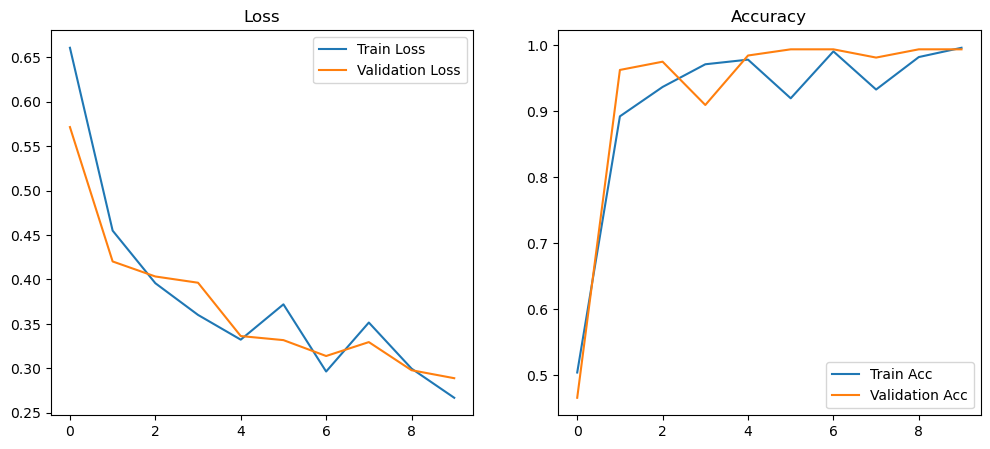

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9938
Precision: 1.0000
Recall   : 0.9866
F1-score : 0.9932

Fold 2/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.5795 - loss: 0.8999 - val_accuracy: 0.9406 - val_loss: 0.1616
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9602 - loss: 0.1435 - val_accuracy: 0.9937 - val_loss: 0.0355
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9960 - loss: 0.0361 - val_accuracy: 0.9531 - val_loss: 0.1040
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9801 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_l

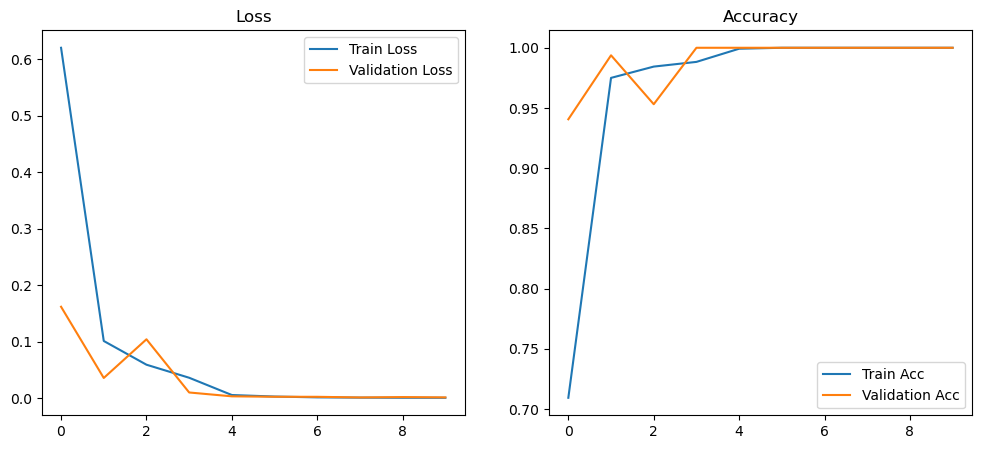

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Fold 3/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.6264 - loss: 0.7326 - val_accuracy: 0.8281 - val_loss: 0.3469
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9463 - loss: 0.1662 - val_accuracy: 0.9125 - val_loss: 0.1776
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9798 - loss: 0.0719 - val_accuracy: 0.9906 - val_loss: 0.0434
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9980 - loss: 0.0201 - val_accuracy: 0.9906 - val_loss: 0.0417
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.9906 - val_loss: 0.0327
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9997 - loss: 0.0049 - val_accuracy: 0.9937 - val_loss: 0.0231
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9937 - val_l

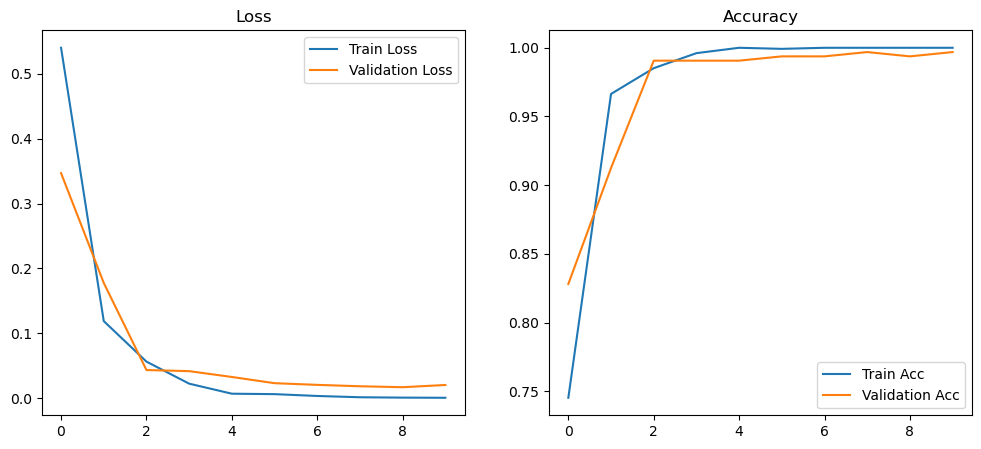

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9934
F1-score : 0.9967

Fold 4/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.5418 - loss: 0.9292 - val_accuracy: 0.9219 - val_loss: 0.2063
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8568 - loss: 0.3099 - val_accuracy: 0.9750 - val_loss: 0.1270
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9829 - loss: 0.0760 - val_accuracy: 0.9750 - val_loss: 0.0650
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9962 - loss: 0.0228 - val_accuracy: 0.9250 - val_loss: 0.2005
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9758 - loss: 0.0648 - val_accuracy: 0.9937 - val_loss: 0.0277
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9906 - val_loss: 0.0221
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9937 - val_l

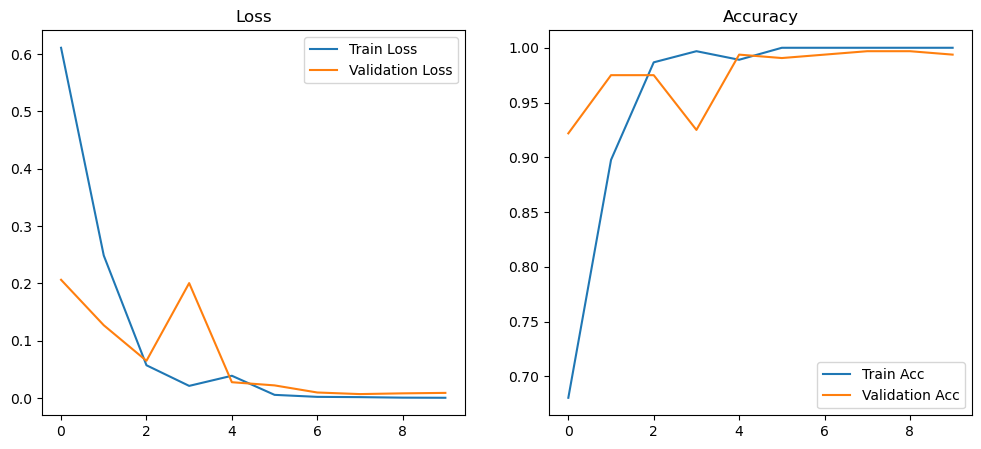

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9938
Precision: 0.9940
Recall   : 0.9940
F1-score : 0.9940

Fold 5/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5583 - loss: 1.0067 - val_accuracy: 0.8625 - val_loss: 0.3432
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9055 - loss: 0.2537 - val_accuracy: 0.9875 - val_loss: 0.0990
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9788 - loss: 0.1056 - val_accuracy: 0.9812 - val_loss: 0.0753
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9857 - loss: 0.0550 - val_accuracy: 0.9969 - val_loss: 0.0338
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9923 - loss: 0.0316 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9980 - loss: 0.0168 - val_accuracy: 0.9969 - val_loss: 0.0250
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9969 - val_l

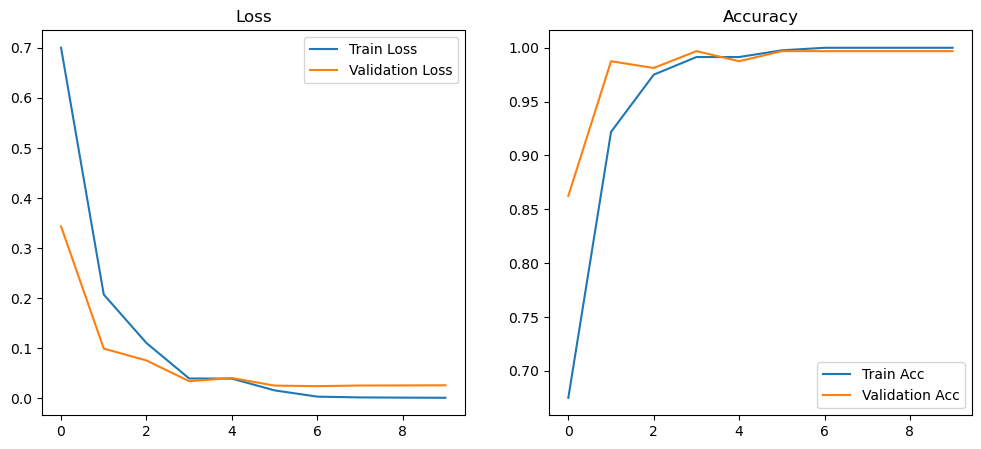

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9942
F1-score : 0.9971

-- Architektura: 2 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6385 - loss: 0.7775 - val_accuracy: 0.9625 - val_loss: 0.1476
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9408 - loss: 0.1614 - val_accuracy: 0.9812 - val_loss: 0.0878
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9870 - loss: 0.0514 - val_accuracy: 0.9750 - val_loss: 0.0695
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9969 - loss: 0.0300 - val_accuracy: 0.9937 - val_loss: 0.0344
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9973 - loss: 0.0120 - val_accuracy: 0.9937 - val_loss: 0.0367
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9937 - val_loss: 0.0419
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 1.0000 - 

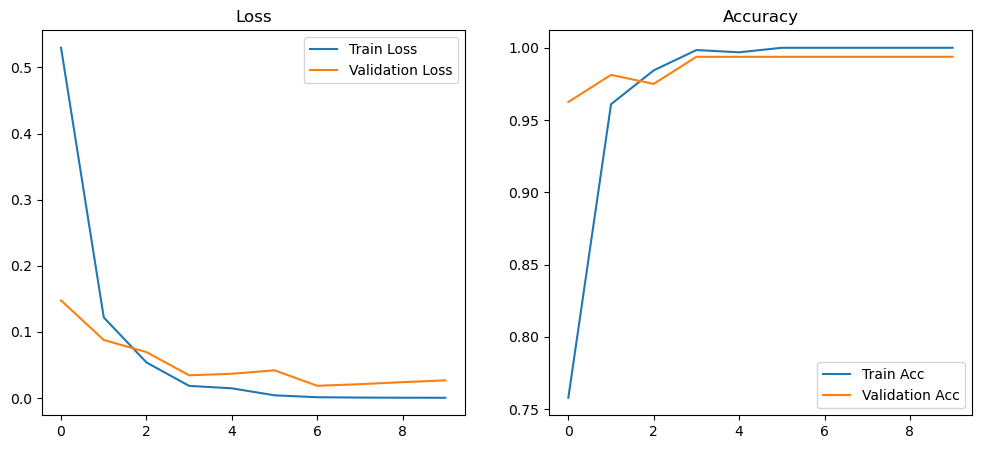

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9938
Precision: 1.0000
Recall   : 0.9866
F1-score : 0.9932

Fold 2/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.6266 - loss: 0.6667 - val_accuracy: 0.9438 - val_loss: 0.1659
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9669 - loss: 0.1123 - val_accuracy: 0.9937 - val_loss: 0.0287
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.9966 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 1.0000 - loss: 5.6559e-04 - val_accuracy: 1.0000 - v

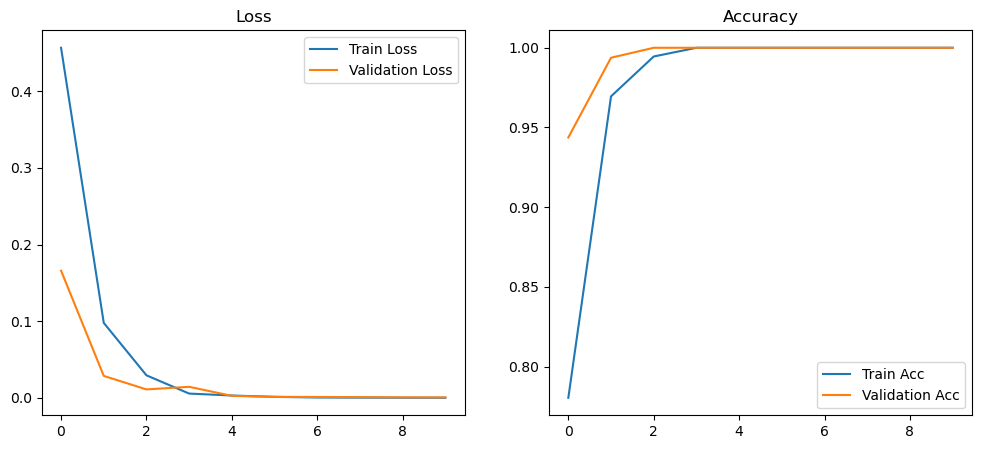

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Fold 3/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.6920 - loss: 0.6499 - val_accuracy: 0.9719 - val_loss: 0.1190
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9918 - loss: 0.0733 - val_accuracy: 0.9719 - val_loss: 0.0933
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.9947 - loss: 0.0274 - val_accuracy: 0.9906 - val_loss: 0.0389
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.9937 - val_loss: 0.0171
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9937 - val_loss: 0.0146
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9937 - val_loss: 0.0147
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 1.0000 - loss: 5.2484e-04 - val_accuracy: 0.9937 - v

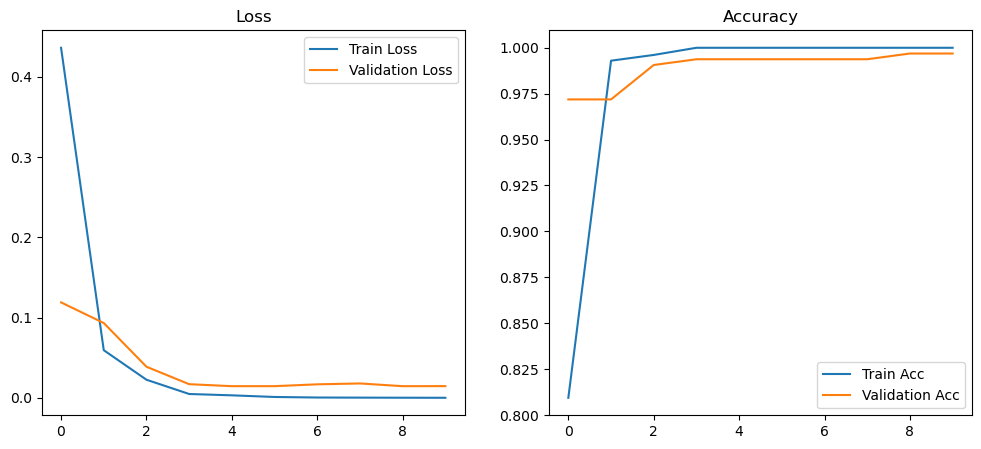

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9934
F1-score : 0.9967

Fold 4/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.6097 - loss: 0.7759 - val_accuracy: 0.9781 - val_loss: 0.1914
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9797 - loss: 0.1301 - val_accuracy: 0.9750 - val_loss: 0.0900
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9920 - loss: 0.0401 - val_accuracy: 0.9781 - val_loss: 0.0578
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.9989 - loss: 0.0144 - val_accuracy: 0.9937 - val_loss: 0.0234
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9906 - val_loss: 0.0327
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 0.9781 - val_loss: 0.0882
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9969 - val_l

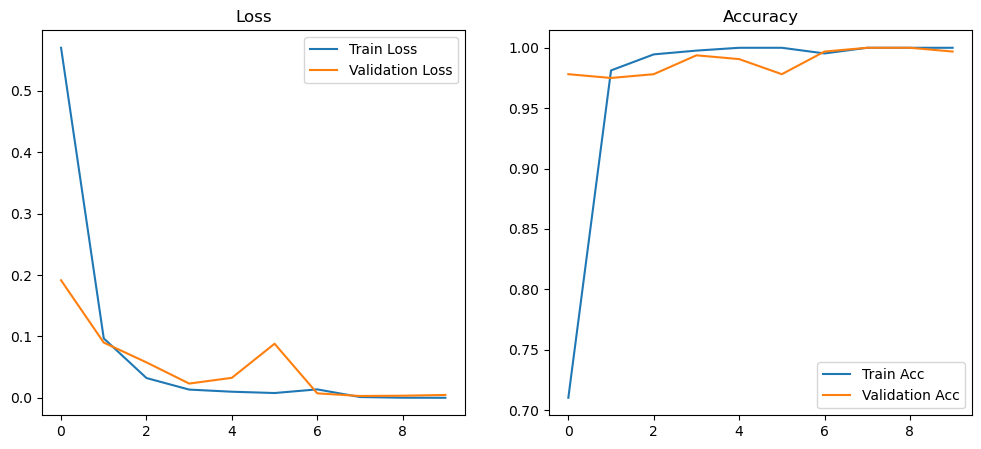

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9940
F1-score : 0.9970

Fold 5/5
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.5010 - loss: 1.0047 - val_accuracy: 0.9187 - val_loss: 0.3967
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9145 - loss: 0.2726 - val_accuracy: 0.9937 - val_loss: 0.0819
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.9768 - loss: 0.0996 - val_accuracy: 0.9906 - val_loss: 0.0480
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9796 - loss: 0.0593 - val_accuracy: 0.9906 - val_loss: 0.0575
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.9952 - loss: 0.0196 - val_accuracy: 0.9875 - val_loss: 0.0416
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9983 - loss: 0.0106 - val_accuracy: 0.9969 - val_loss: 0.0318
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9969 - val_l

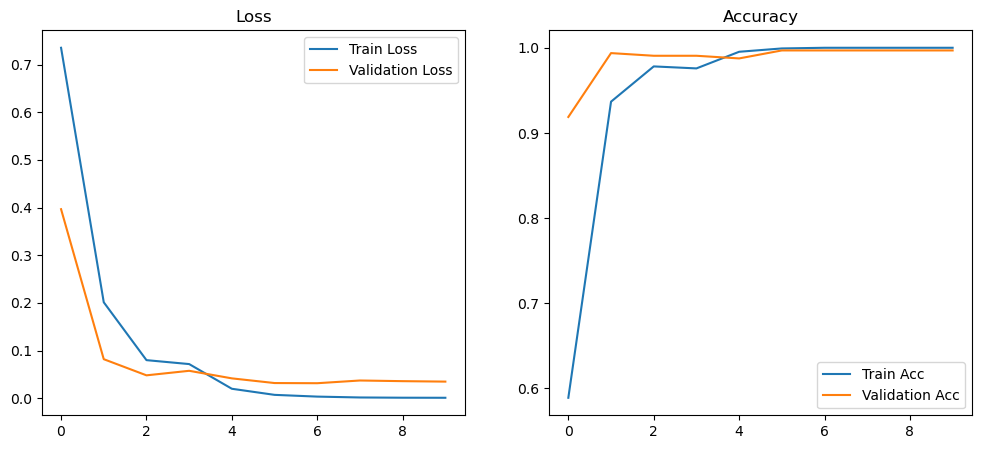

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9969
Precision: 1.0000
Recall   : 0.9942
F1-score : 0.9971

=== Klasyfikacja: Grape___healthy vs Grape___Black_rot ===

-- Architektura: 1 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.5684 - loss: 2.5140 - val_accuracy: 0.6327 - val_loss: 0.5937
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6487 - loss: 0.5699 - val_accuracy: 0.6327 - val_loss: 0.4064
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7644 - loss: 0.3879 - val_accuracy: 0.9755 - val_loss: 0.4104
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9226 - loss: 0.3464 - val_accuracy: 0.9184 - val_loss: 0.3146
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9365 - loss: 0.3061 - val_accuracy: 0.8653 - val_loss: 0.3350
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9399 - loss: 0.2726 - val_accuracy: 0.9796 - val_loss: 0.3247
Epoch 7/10
31/31 

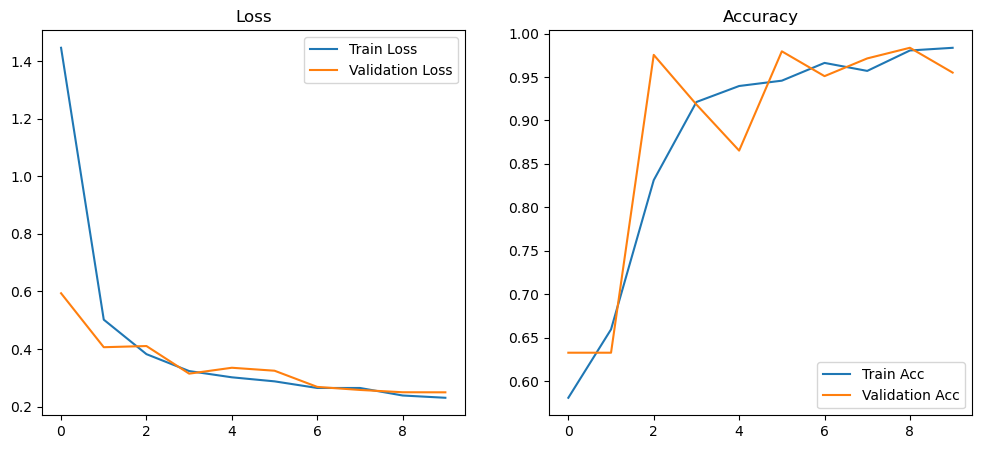

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9551
Precision: 0.9337
Recall   : 1.0000
F1-score : 0.9657

Fold 2/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5937 - loss: 1.3414 - val_accuracy: 0.7633 - val_loss: 0.4447
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8269 - loss: 0.3935 - val_accuracy: 0.9102 - val_loss: 0.2619
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9162 - loss: 0.2305 - val_accuracy: 0.9510 - val_loss: 0.1608
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9576 - loss: 0.1324 - val_accuracy: 0.9388 - val_loss: 0.1562
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9907 - loss: 0.0778 - val_accuracy: 0.9714 - val_loss: 0.0840
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9902 - loss: 0.0544 - val_accuracy: 0.9673 - val_loss: 0.0818
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9910 - loss: 0.0404 - val_accuracy: 0.9796 - val_loss: 0

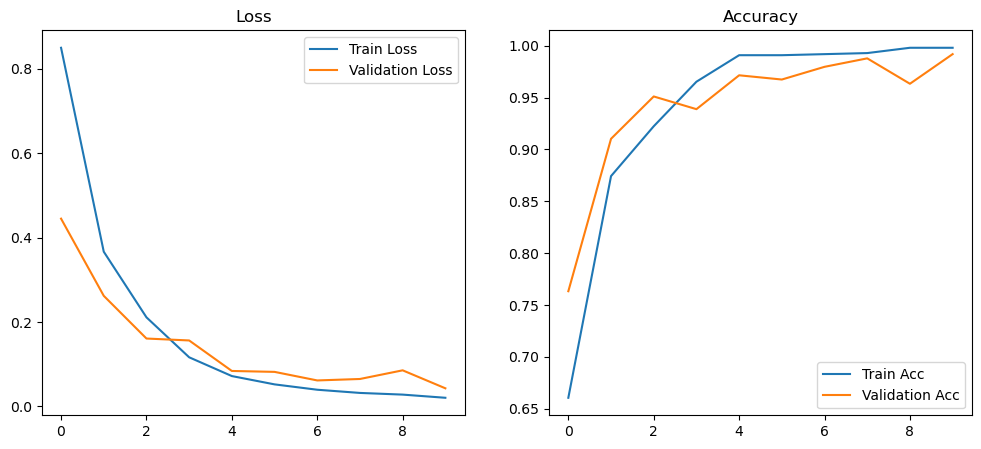

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9918
Precision: 0.9938
Recall   : 0.9938
F1-score : 0.9938

Fold 3/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.5715 - loss: 1.4054 - val_accuracy: 0.6531 - val_loss: 0.5668
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6381 - loss: 0.5198 - val_accuracy: 0.6531 - val_loss: 0.4048
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7675 - loss: 0.3969 - val_accuracy: 0.9429 - val_loss: 0.3547
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9024 - loss: 0.3511 - val_accuracy: 0.9061 - val_loss: 0.3189
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9277 - loss: 0.3054 - val_accuracy: 0.9347 - val_loss: 0.2984
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9588 - loss: 0.2745 - val_accuracy: 0.9633 - val_loss: 0.2761
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9675 - loss: 0.2892 - val_accuracy: 0.9796 - val_loss: 0

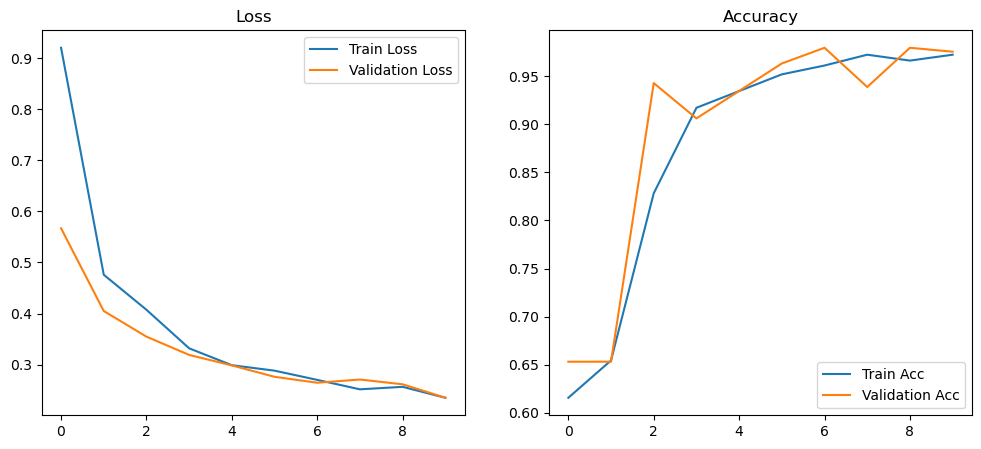

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9755
Precision: 0.9639
Recall   : 1.0000
F1-score : 0.9816

Fold 4/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5520 - loss: 2.2466 - val_accuracy: 0.8730 - val_loss: 0.4467
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8740 - loss: 0.3464 - val_accuracy: 0.9344 - val_loss: 0.2120
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9474 - loss: 0.1755 - val_accuracy: 0.9508 - val_loss: 0.1433
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9671 - loss: 0.1168 - val_accuracy: 0.9262 - val_loss: 0.1778
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9650 - loss: 0.1052 - val_accuracy: 0.9467 - val_loss: 0.1182
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9756 - loss: 0.0784 - val_accuracy: 0.9631 - val_loss: 0.0866
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9906 - loss: 0.0392 - val_accuracy: 0.9631 - val_loss: 0

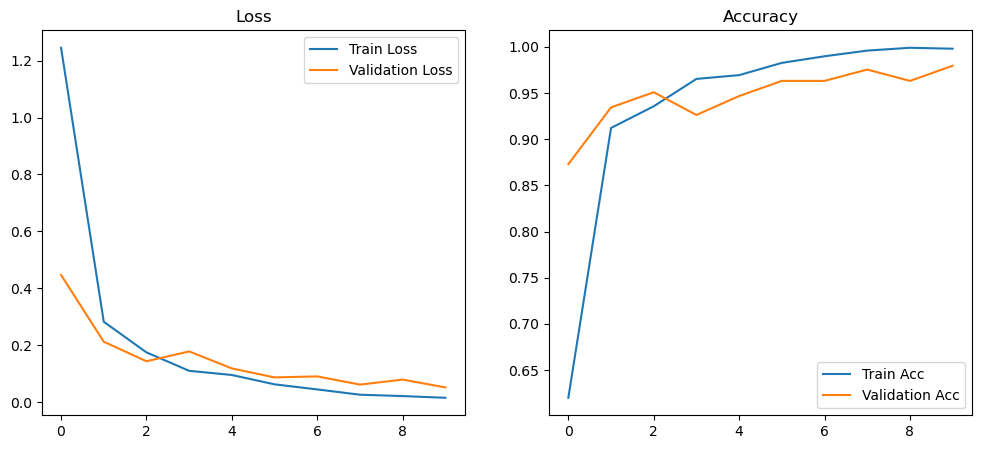

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9795
Precision: 0.9873
Recall   : 0.9811
F1-score : 0.9842

Fold 5/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.6209 - loss: 1.6935 - val_accuracy: 0.9098 - val_loss: 0.2459
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9381 - loss: 0.2084 - val_accuracy: 0.9344 - val_loss: 0.1653
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9689 - loss: 0.1247 - val_accuracy: 0.9713 - val_loss: 0.1141
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9868 - loss: 0.0615 - val_accuracy: 0.9713 - val_loss: 0.1049
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9960 - loss: 0.0342 - val_accuracy: 0.9672 - val_loss: 0.1156
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9999 - loss: 0.0199 - val_accuracy: 0.9713 - val_loss: 0.0946
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9997 - loss: 0.0131 - val_accuracy: 0.9713 - val_loss: 0

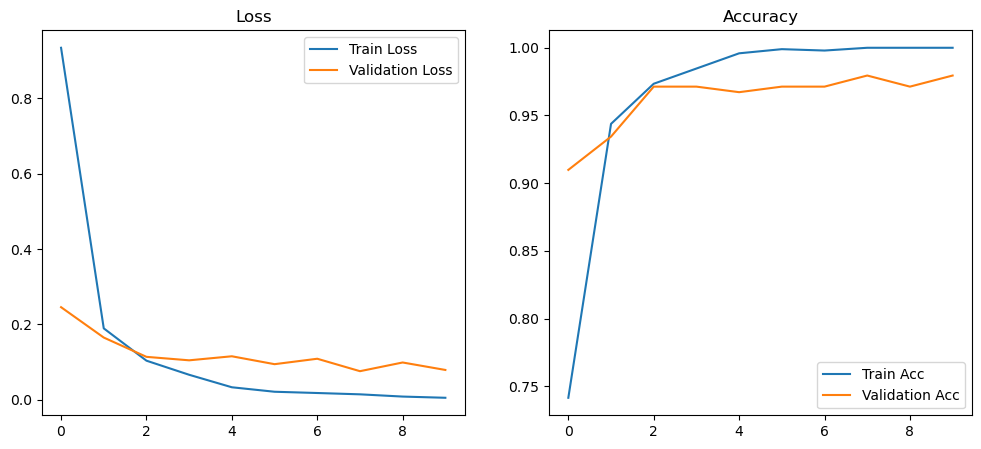

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9795
Precision: 0.9878
Recall   : 0.9818
F1-score : 0.9848

-- Architektura: 1 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.5739 - loss: 2.1379 - val_accuracy: 0.8776 - val_loss: 0.3744
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9427 - loss: 0.2665 - val_accuracy: 0.9755 - val_loss: 0.0831
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9662 - loss: 0.0864 - val_accuracy: 0.9837 - val_loss: 0.0552
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9954 - loss: 0.0371 - val_accuracy: 0.9878 - val_loss: 0.0436
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9973 - loss: 0.0212 - val_accuracy: 0.9673 - val_loss: 0.0632
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9984 - loss: 0.0149 - val_accuracy: 0.9918 - val_loss: 0.0273
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 1.0000 - 

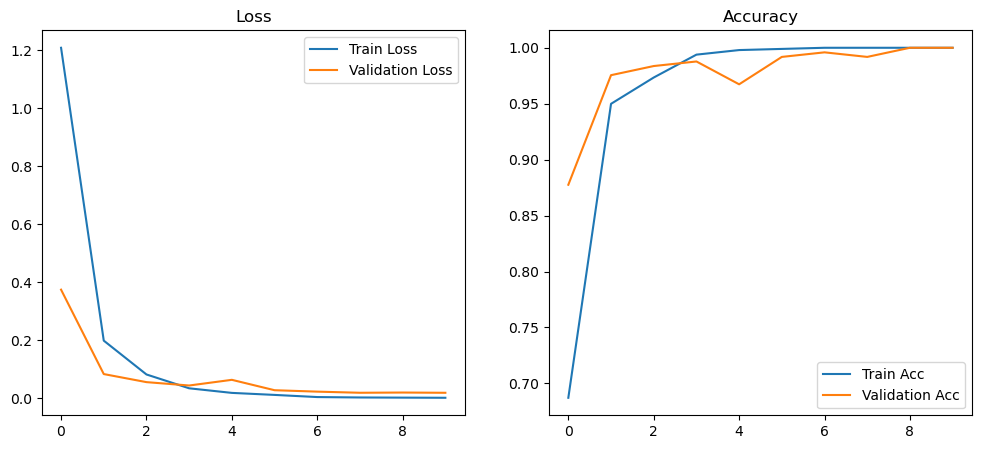

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Fold 2/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5420 - loss: 3.1510 - val_accuracy: 0.6571 - val_loss: 0.5608
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.7985 - loss: 0.4146 - val_accuracy: 0.9592 - val_loss: 0.1663
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9544 - loss: 0.1248 - val_accuracy: 0.9551 - val_loss: 0.1074
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9780 - loss: 0.0636 - val_accuracy: 0.9837 - val_loss: 0.0574
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9981 - loss: 0.0250 - val_accuracy: 0.9714 - val_loss: 0.0631
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9994 - loss: 0.0148 - val_accuracy: 0.9878 - val_loss: 0.0364
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9998 - loss: 0.0064 - val_accuracy: 0.9592 - val_l

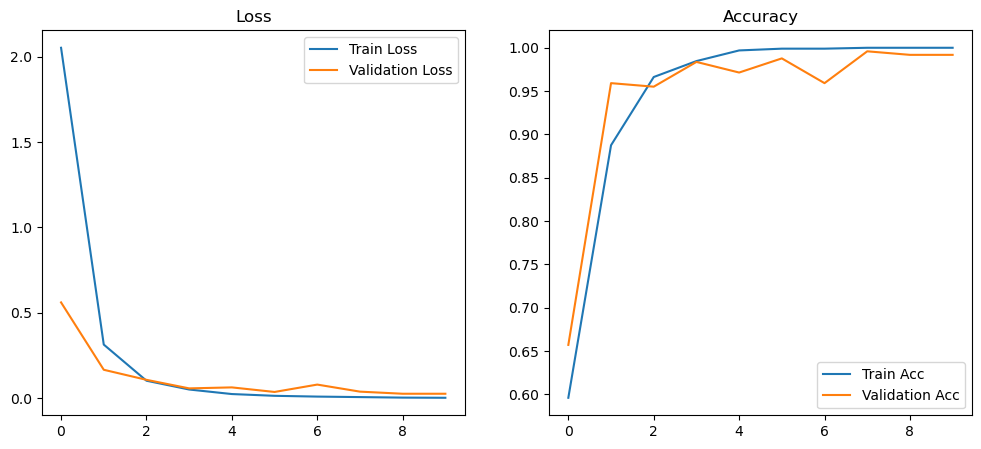

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9918
Precision: 0.9938
Recall   : 0.9938
F1-score : 0.9938

Fold 3/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.6532 - loss: 2.7113 - val_accuracy: 0.8857 - val_loss: 0.3540
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.8831 - loss: 0.2994 - val_accuracy: 0.8408 - val_loss: 0.3354
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9287 - loss: 0.1879 - val_accuracy: 0.9143 - val_loss: 0.2313
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9594 - loss: 0.1219 - val_accuracy: 0.9796 - val_loss: 0.0881
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9940 - loss: 0.0541 - val_accuracy: 0.9796 - val_loss: 0.0742
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9852 - loss: 0.0458 - val_accuracy: 0.9796 - val_loss: 0.0748
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9977 - loss: 0.0278 - val_accuracy: 0.9551 - val_l

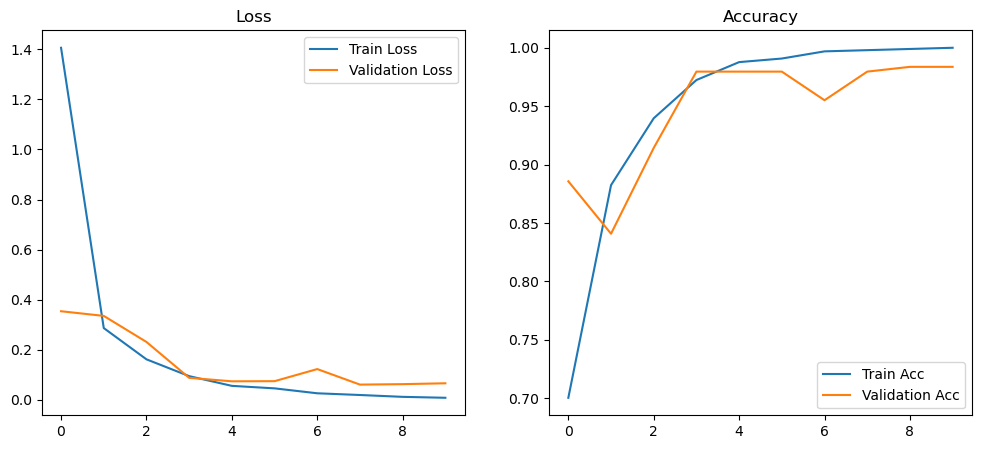

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9837
Precision: 0.9756
Recall   : 1.0000
F1-score : 0.9877

Fold 4/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5618 - loss: 1.7354 - val_accuracy: 0.7705 - val_loss: 0.4902
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.8349 - loss: 0.4060 - val_accuracy: 0.8852 - val_loss: 0.2798
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9324 - loss: 0.2009 - val_accuracy: 0.9221 - val_loss: 0.1901
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9701 - loss: 0.1223 - val_accuracy: 0.9426 - val_loss: 0.1526
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9894 - loss: 0.0698 - val_accuracy: 0.9590 - val_loss: 0.0939
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.9829 - loss: 0.0652 - val_accuracy: 0.9631 - val_loss: 0.1048
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9951 - loss: 0.0427 - val_accuracy: 0.9672 - val_l

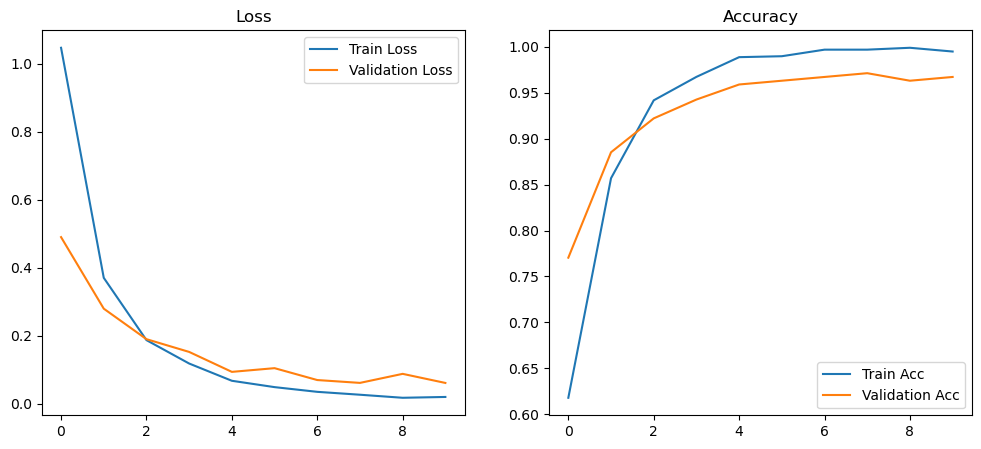

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9672
Precision: 1.0000
Recall   : 0.9497
F1-score : 0.9742

Fold 5/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.6032 - loss: 2.0812 - val_accuracy: 0.8484 - val_loss: 0.4138
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9276 - loss: 0.2685 - val_accuracy: 0.9426 - val_loss: 0.1555
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9736 - loss: 0.0758 - val_accuracy: 0.9713 - val_loss: 0.0919
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9902 - loss: 0.0390 - val_accuracy: 0.9795 - val_loss: 0.0763
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9995 - loss: 0.0155 - val_accuracy: 0.9795 - val_loss: 0.0763
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.9795 - val_loss: 0.0849
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.9795 - val_l

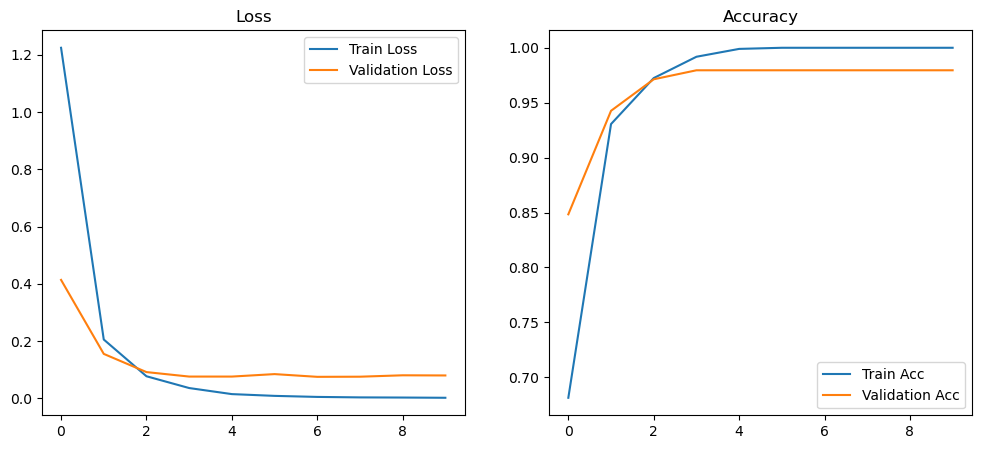

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9795
Precision: 0.9938
Recall   : 0.9758
F1-score : 0.9847

-- Architektura: 2 warstw, 32 neuronów --

Fold 1/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.6740 - loss: 0.6227 - val_accuracy: 0.9184 - val_loss: 0.2285
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9212 - loss: 0.1973 - val_accuracy: 0.9796 - val_loss: 0.0710
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9777 - loss: 0.0664 - val_accuracy: 0.9673 - val_loss: 0.0759
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9914 - loss: 0.0319 - val_accuracy: 0.9837 - val_loss: 0.0356
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9950 - loss: 0.0198 - val_accuracy: 0.9837 - val_loss: 0.0309
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9986 - loss: 0.0127 - val_accuracy: 0.9837 - val_loss: 0.0491
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9981 - 

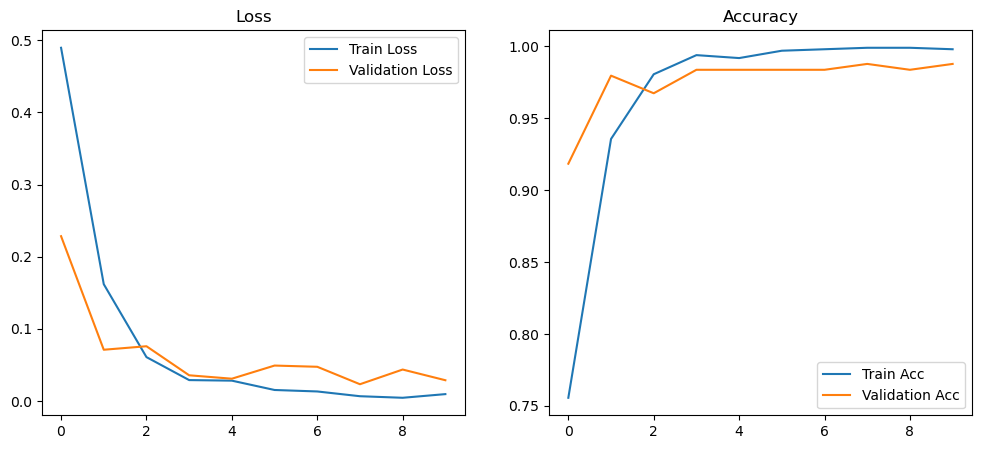

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9878
Precision: 0.9872
Recall   : 0.9935
F1-score : 0.9904

Fold 2/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.6332 - loss: 0.6406 - val_accuracy: 0.8612 - val_loss: 0.2755
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9334 - loss: 0.1502 - val_accuracy: 0.9796 - val_loss: 0.0696
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9875 - loss: 0.0564 - val_accuracy: 0.9755 - val_loss: 0.0810
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9916 - loss: 0.0418 - val_accuracy: 0.9551 - val_loss: 0.1176
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9923 - loss: 0.0323 - val_accuracy: 0.9837 - val_loss: 0.0374
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9981 - loss: 0.0097 - val_accuracy: 0.9959 - val_loss: 0.0249
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9960 - loss: 0.0165 - val_accuracy: 0.9959 - val_l

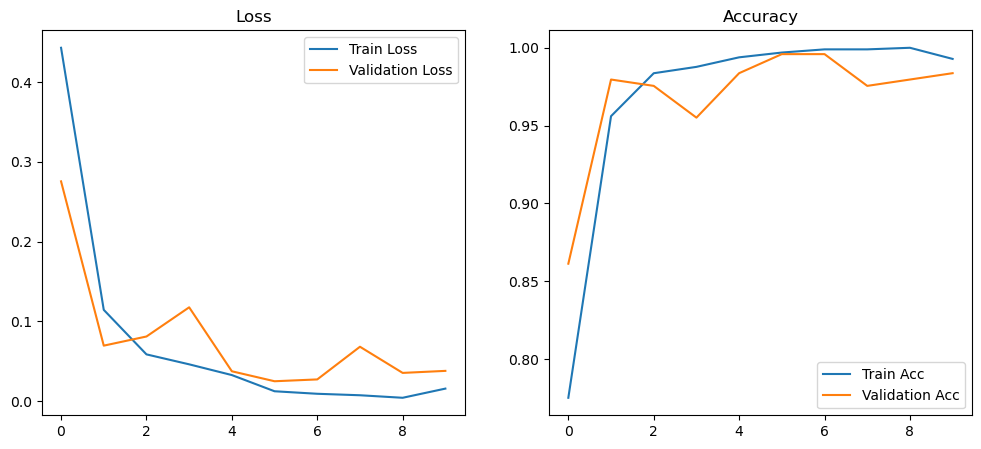

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9837
Precision: 0.9816
Recall   : 0.9938
F1-score : 0.9877

Fold 3/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6327 - loss: 0.8223 - val_accuracy: 0.8531 - val_loss: 0.3278
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8889 - loss: 0.2776 - val_accuracy: 0.9714 - val_loss: 0.0948
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9754 - loss: 0.0777 - val_accuracy: 0.9837 - val_loss: 0.0581
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9716 - loss: 0.0755 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9943 - loss: 0.0302 - val_accuracy: 0.9878 - val_loss: 0.0379
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9919 - loss: 0.0343 - val_accuracy: 0.9918 - val_loss: 0.0218
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9882 - loss: 0.0329 - val_accuracy: 0.9918 - val_l

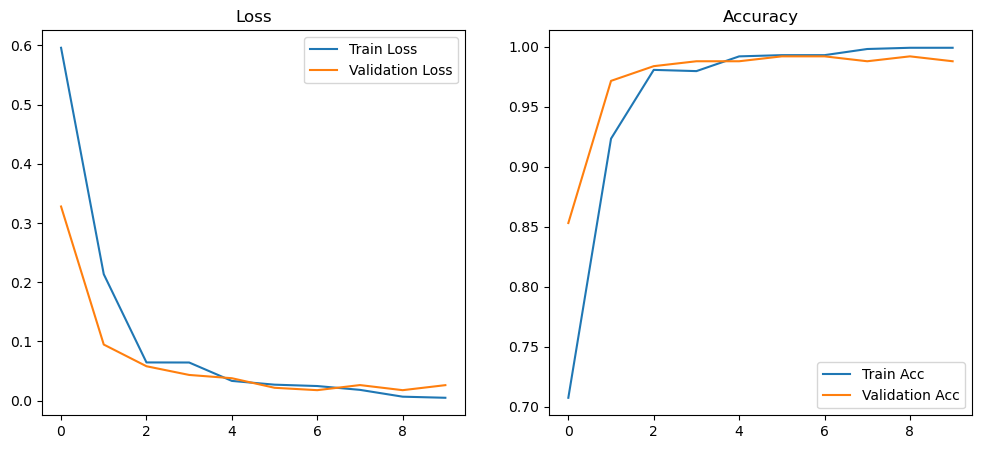

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9878
Precision: 0.9816
Recall   : 1.0000
F1-score : 0.9907

Fold 4/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.5332 - loss: 0.7918 - val_accuracy: 0.8074 - val_loss: 0.3860
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9038 - loss: 0.2694 - val_accuracy: 0.9590 - val_loss: 0.1071
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9750 - loss: 0.0827 - val_accuracy: 0.9549 - val_loss: 0.0966
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9877 - val_loss: 0.0529
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9924 - loss: 0.0208 - val_accuracy: 0.9836 - val_loss: 0.0527
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9936 - loss: 0.0289 - val_accuracy: 0.9836 - val_loss: 0.0414
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9945 - loss: 0.0206 - val_accuracy: 0.9795 - val_l

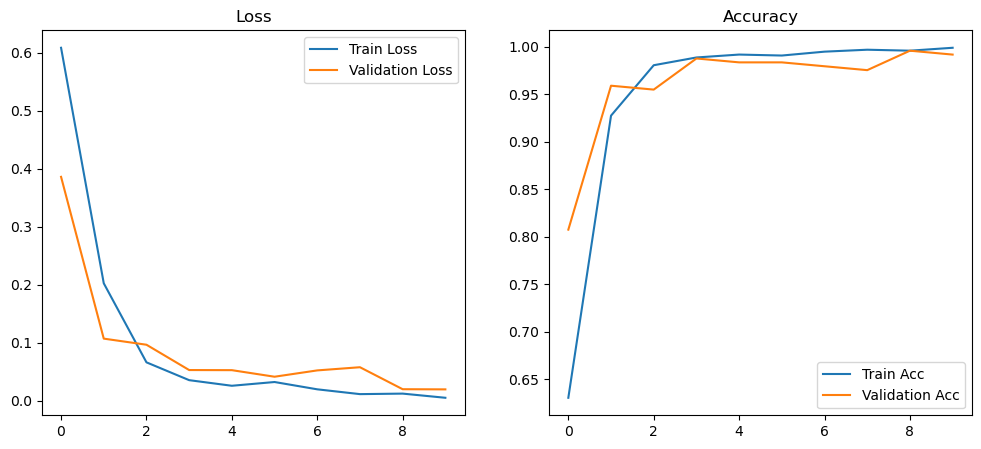

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9918
Precision: 0.9876
Recall   : 1.0000
F1-score : 0.9938

Fold 5/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.5979 - loss: 0.9398 - val_accuracy: 0.7172 - val_loss: 0.3994
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8566 - loss: 0.3399 - val_accuracy: 0.9303 - val_loss: 0.1481
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9740 - loss: 0.0842 - val_accuracy: 0.9713 - val_loss: 0.1094
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9884 - loss: 0.0501 - val_accuracy: 0.9713 - val_loss: 0.1072
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9938 - loss: 0.0231 - val_accuracy: 0.9754 - val_loss: 0.1093
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9958 - loss: 0.0168 - val_accuracy: 0.9754 - val_loss: 0.0689
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9754 - val_l

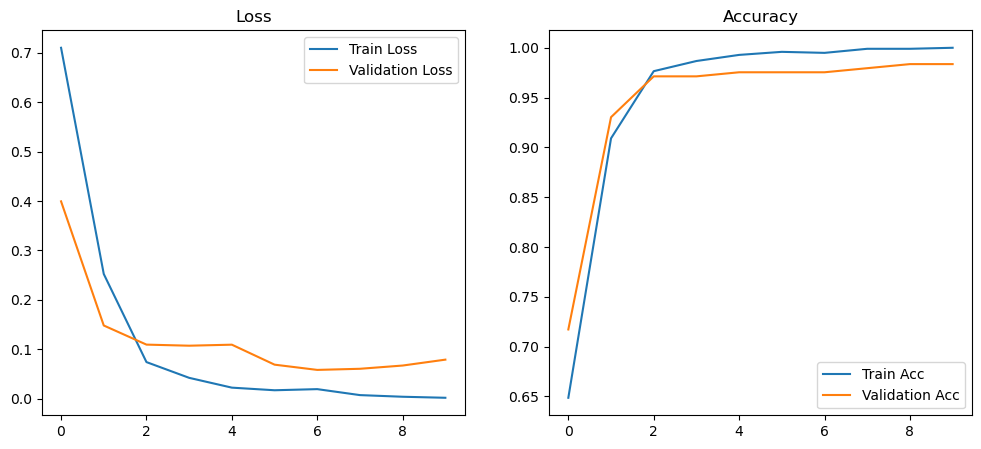

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9836
Precision: 1.0000
Recall   : 0.9758
F1-score : 0.9877

-- Architektura: 2 warstw, 64 neuronów --

Fold 1/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.5676 - loss: 1.2610 - val_accuracy: 0.6327 - val_loss: 0.5399
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.6901 - loss: 0.4313 - val_accuracy: 0.9633 - val_loss: 0.3029
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9495 - loss: 0.2485 - val_accuracy: 0.9796 - val_loss: 0.2825
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9792 - loss: 0.2457 - val_accuracy: 0.9714 - val_loss: 0.2763
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9851 - loss: 0.2316 - val_accuracy: 0.9837 - val_loss: 0.2663
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9730 - loss: 0.2263 - val_accuracy: 0.9714 - val_loss: 0.2773
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9865 - 

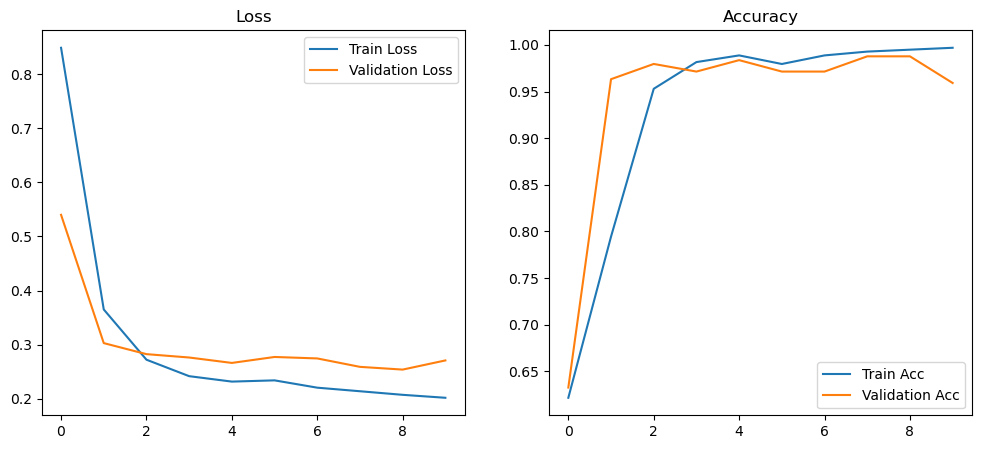

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


➡️ Statystyki końcowe dla Fold 1:
Accuracy : 0.9592
Precision: 0.9394
Recall   : 1.0000
F1-score : 0.9688

Fold 2/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.6052 - loss: 1.0409 - val_accuracy: 0.6571 - val_loss: 0.5032
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.8075 - loss: 0.3881 - val_accuracy: 0.9388 - val_loss: 0.1741
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9602 - loss: 0.1102 - val_accuracy: 0.9265 - val_loss: 0.1504
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9820 - loss: 0.0717 - val_accuracy: 0.9714 - val_loss: 0.0843
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9961 - loss: 0.0277 - val_accuracy: 0.9918 - val_loss: 0.0225
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.9810 - loss: 0.0605 - val_accuracy: 0.9714 - val_loss: 0.0670
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9913 - loss: 0.0258 - val_accuracy: 1.0000 - val_l

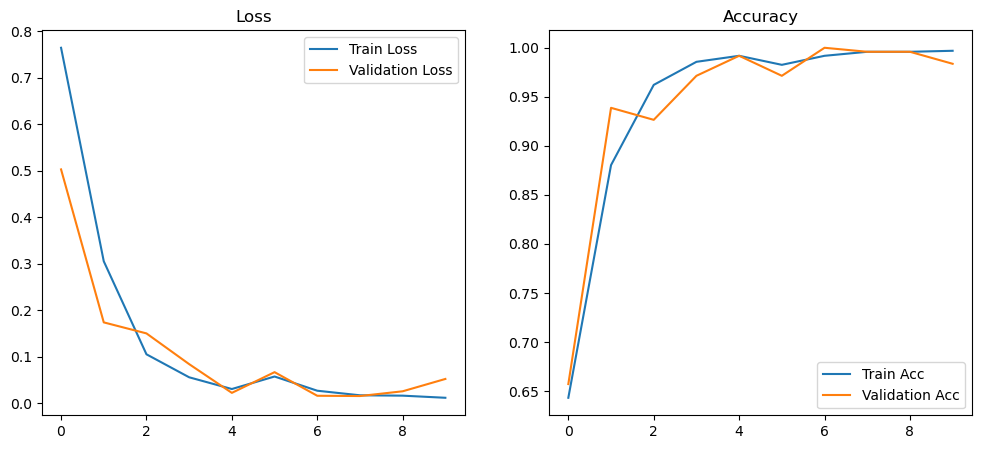

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


➡️ Statystyki końcowe dla Fold 2:
Accuracy : 0.9837
Precision: 0.9758
Recall   : 1.0000
F1-score : 0.9877

Fold 3/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.5776 - loss: 1.1237 - val_accuracy: 0.6531 - val_loss: 0.5146
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.8010 - loss: 0.4159 - val_accuracy: 0.8735 - val_loss: 0.2921
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9307 - loss: 0.1800 - val_accuracy: 0.9551 - val_loss: 0.1112
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9713 - loss: 0.0886 - val_accuracy: 0.9796 - val_loss: 0.0733
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9741 - loss: 0.0767 - val_accuracy: 0.9755 - val_loss: 0.0537
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9911 - loss: 0.0398 - val_accuracy: 0.9918 - val_loss: 0.0517
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9637 - loss: 0.1076 - val_accuracy: 0.9878 - val_l

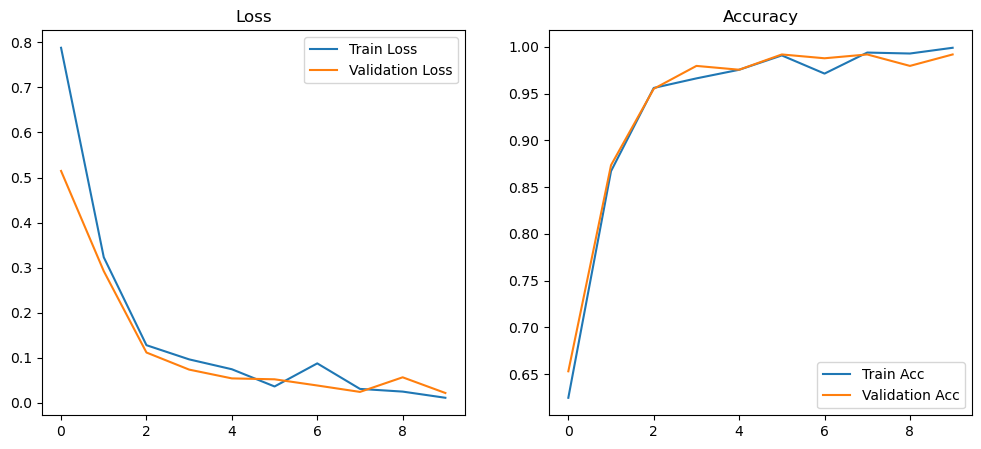

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


➡️ Statystyki końcowe dla Fold 3:
Accuracy : 0.9918
Precision: 0.9938
Recall   : 0.9938
F1-score : 0.9938

Fold 4/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.6596 - loss: 0.9669 - val_accuracy: 0.6516 - val_loss: 0.6055
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.6745 - loss: 0.5394 - val_accuracy: 0.9426 - val_loss: 0.3494
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9318 - loss: 0.3267 - val_accuracy: 0.9016 - val_loss: 0.3111
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9518 - loss: 0.3034 - val_accuracy: 0.8811 - val_loss: 0.3361
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9606 - loss: 0.2568 - val_accuracy: 0.9877 - val_loss: 0.2497
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9734 - loss: 0.2344 - val_accuracy: 0.9795 - val_loss: 0.2550
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9805 - loss: 0.2473 - val_accuracy: 0.9836 - val_l

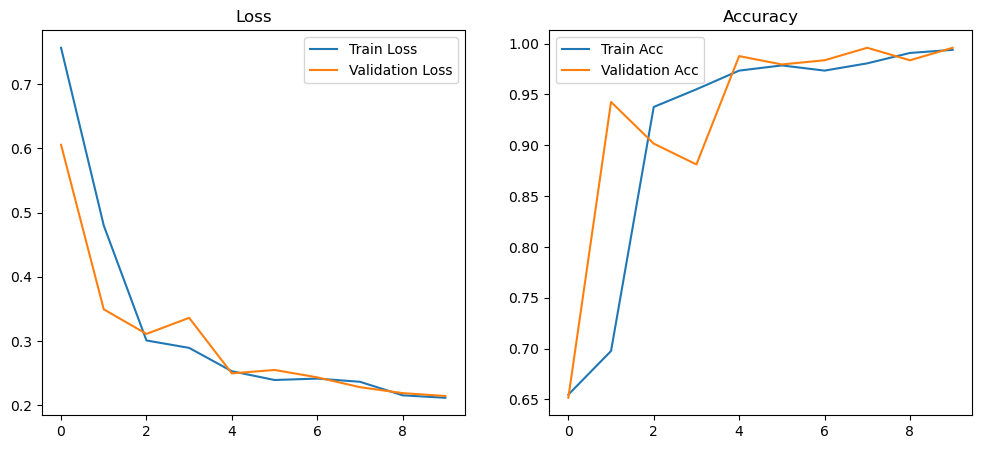

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


➡️ Statystyki końcowe dla Fold 4:
Accuracy : 0.9959
Precision: 1.0000
Recall   : 0.9937
F1-score : 0.9968

Fold 5/5
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.5958 - loss: 0.9775 - val_accuracy: 0.9508 - val_loss: 0.2921
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9357 - loss: 0.2398 - val_accuracy: 0.9754 - val_loss: 0.1039
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9707 - loss: 0.0959 - val_accuracy: 0.9754 - val_loss: 0.0850
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9875 - loss: 0.0496 - val_accuracy: 0.9754 - val_loss: 0.0891
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9926 - loss: 0.0278 - val_accuracy: 0.9836 - val_loss: 0.0688
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9935 - loss: 0.0226 - val_accuracy: 0.9795 - val_loss: 0.0687
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9986 - loss: 0.0130 - val_accuracy: 0.9795 - val_l

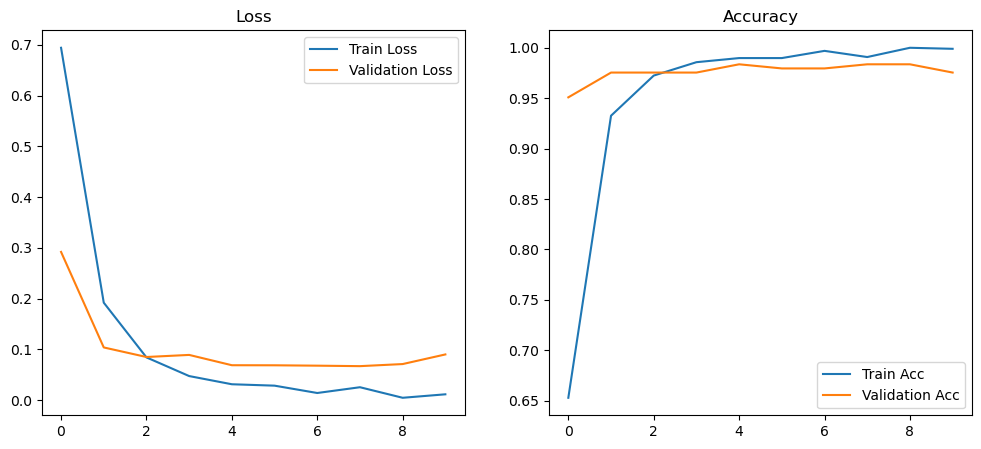

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


➡️ Statystyki końcowe dla Fold 5:
Accuracy : 0.9754
Precision: 1.0000
Recall   : 0.9636
F1-score : 0.9815


In [5]:
show_all_class_pairs(class_pairs)

layer_options = [1, 2]
neuron_options = [32, 64]

for class1, class2 in class_pairs:
    print(f"\n=== Klasyfikacja: {class1} vs {class2} ===")
    images, labels = prepare_images(class1, class2)

    for layers in layer_options:
        for hidden_units in neuron_options:
            print(f"\n-- Architektura: {layers} warstw, {hidden_units} neuronów --")
            kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

            for fold, (train_idx, test_idx) in enumerate(kf.split(images), 1):
                print(f"\nFold {fold}/{n_splits}")
                X_train, X_test = images[train_idx], images[test_idx]
                y_train, y_test = labels[train_idx], labels[test_idx]

                model = create_model(hidden_units=hidden_units, layers=layers)

                # Trenuj i pokazuj postęp (verbose=1)
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                    validation_data=(X_test, y_test), verbose=1)

                # Wykres strat i dokładności
                plot_training(history)

                # Predykcja i metryki po ostatniej epoce
                y_pred = (model.predict(X_test) > 0.5).astype(int)

                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred)
                rec = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                print(f"➡️ Statystyki końcowe dla Fold {fold}:")
                print(f"Accuracy : {acc:.4f}")
                print(f"Precision: {prec:.4f}")
                print(f"Recall   : {rec:.4f}")
                print(f"F1-score : {f1:.4f}")

                # Zapisz model (opcjonalnie)
                model.save(f'model_{class1}_vs_{class2}_L{layers}_H{hidden_units}_F{fold}.h5')
